In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import sweetviz as sv
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
twitch_df_X = pd.read_pickle('twitch_df_wrng.pkl')

In [4]:
twitch_df_X.head(2)

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_channel_ratio,Date,one_month_future,three_month_future,six_month_future,Hours_watched_1mth,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200
0,7 Days to Die,1,2016,269681,12131,4405,44,1240,362.0,16.0,0.04,2016-01-01,2016-02-01,2016-04-01,2016-07-01,139365,212199,2063116,1,1
1,Agar.io,1,2016,255617,20705,4183,74,4472,344.0,28.0,0.08,2016-01-01,2016-02-01,2016-04-01,2016-07-01,254146,198757,0,1,1


In [5]:
twitch_df_X = twitch_df_X[twitch_df_X['Date'] != '2023-03-01']

In [6]:
twitch_df_X[(twitch_df_X['Year'] == 2023)].tail(2)

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_channel_ratio,Date,one_month_future,three_month_future,six_month_future,Hours_watched_1mth,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200
895,Undisputed,2,2023,1066525,24598,69575,173,5066,1532.0,35.0,0.02,2023-02-01,2023-03-01,2023-05-01,2023-08-01,0,0,0,0,0
896,Wild Hearts,2,2023,4637613,132860,76574,845,15433,6663.0,191.0,0.03,2023-02-01,2023-03-01,2023-05-01,2023-08-01,702432,0,0,0,1


In [7]:
twitch_df_X[twitch_df_X['Hours_watched_1mth'] == 0].count()

Game                  1193
Month                 1193
Year                  1193
Hours_watched         1193
Hours_streamed        1193
Peak_viewers          1193
Peak_channels         1193
Streamers             1193
Avg_viewers           1193
Avg_channels          1193
Avg_channel_ratio     1193
Date                  1193
one_month_future      1193
three_month_future    1193
six_month_future      1193
Hours_watched_1mth    1193
Hours_watched_3mth    1193
Hours_watched_6mth    1193
Jan_Debut_Month       1193
Next_mth_200          1193
dtype: int64

In [8]:
'''Baseline model would predict that ~60% of games will not be in the top 200 after 1. 
809 games were still in the top 200 after 1 month. Here I am setting up baseline for comparison later. Notebook is easier
to read when the analysis of this baseline prediction and model prediction are by each other'''

'Baseline model would predict that ~60% of games will not be in the top 200 after 1. \n809 games were still in the top 200 after 1 month. Here I am setting up baseline for comparison later. Notebook is easier\nto read when the analysis of this baseline prediction and model prediction are by each other'

In [9]:
baseline_df = twitch_df_X.sort_values(by = 'Hours_watched', ascending = False)

In [10]:
baseline_df.reset_index(drop = True, inplace = True)

In [11]:
base_pred = [1]*809 + [0]*1193

In [12]:
baseline_df['prediction'] = base_pred

In [13]:
baseline_df.head(2)

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,...,Date,one_month_future,three_month_future,six_month_future,Hours_watched_1mth,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200,prediction
0,League of Legends,1,2016,94377226,1362044,530270,2903,129172,126851.0,1831.0,...,2016-01-01,2016-02-01,2016-04-01,2016-07-01,93154772,88389049,77871713,1,1,1
1,Escape from Tarkov,1,2022,93334264,1343113,690725,3186,71932,125449.0,1805.0,...,2022-01-01,2022-02-01,2022-04-01,2022-07-01,24312041,14338993,38628111,1,1,1


In [14]:
X_train, X_test, y_train, y_test = train_test_split(twitch_df_X.drop(columns=['Game', 'Month', 'Year', 'Date', 'one_month_future', 
                                                                              'three_month_future','six_month_future',
                                                                              'Hours_watched_3mth', 'Hours_watched_1mth',
                                                                              'Hours_watched_6mth', 'Next_mth_200']), 
                                                    twitch_df_X.Next_mth_200, test_size=0.25, stratify = twitch_df_X.Next_mth_200,
                                                    random_state=1701)

In [15]:
c_report = sv.compare([X_train, "Training Data"], [X_test, "Test Data"])

                                             |          | [  0%]   00:00 -> (? left)

In [16]:
'Test and training data do not appear to be different by any obvious criteria'

'Test and training data do not appear to be different by any obvious criteria'


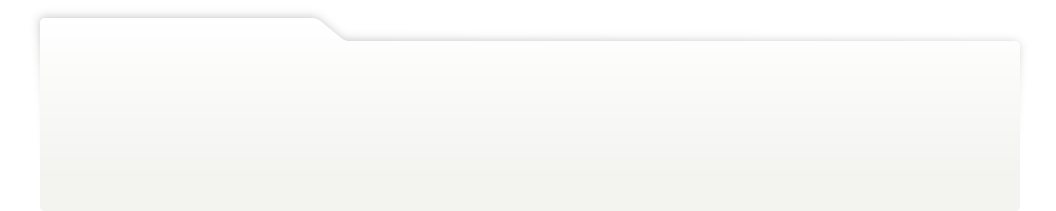
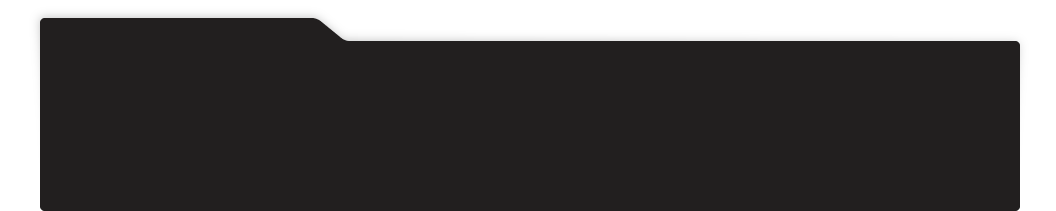
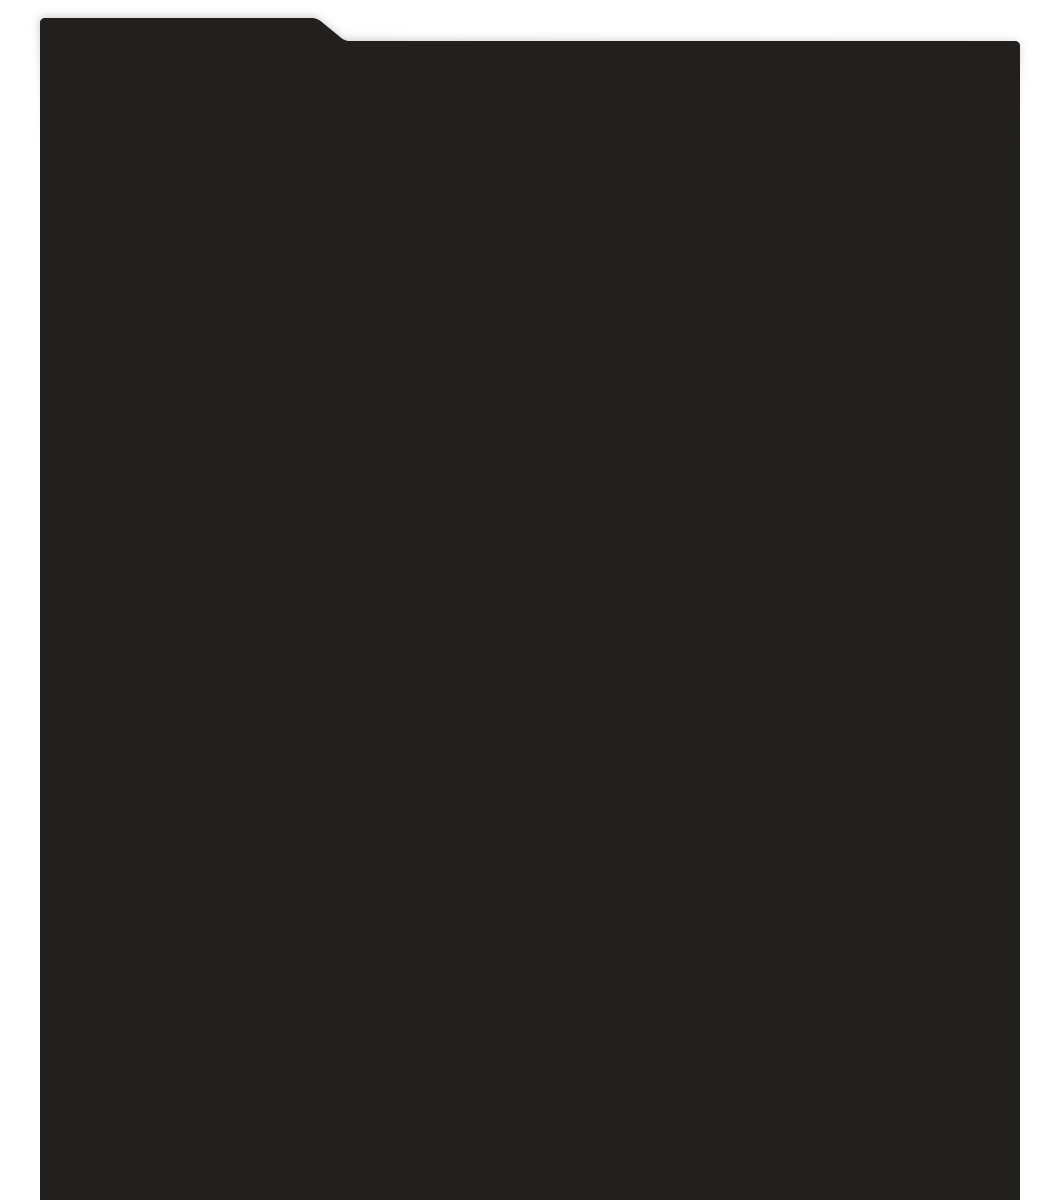
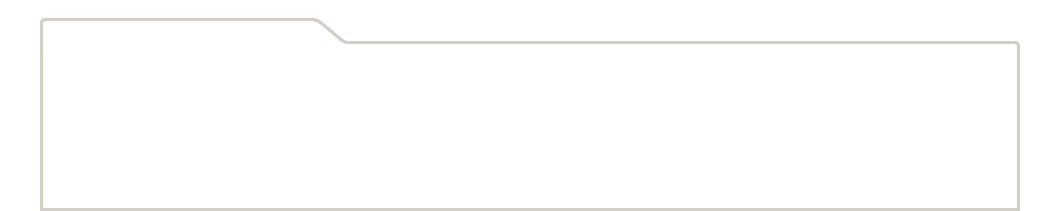
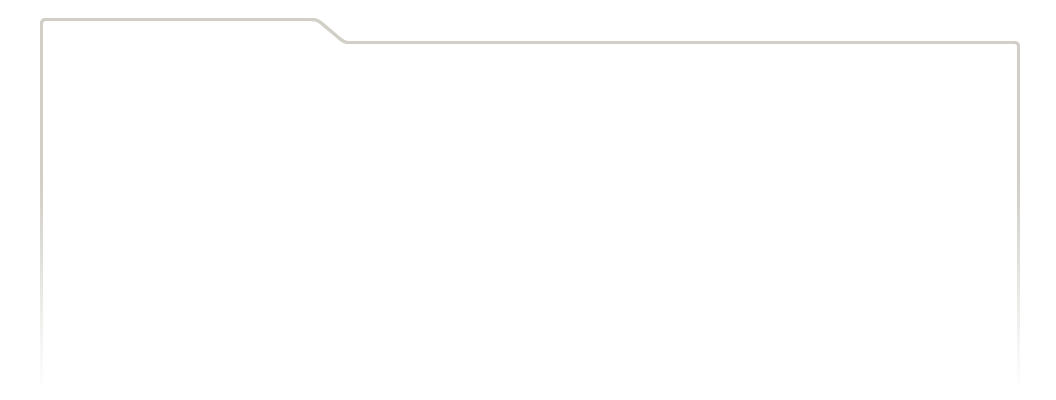
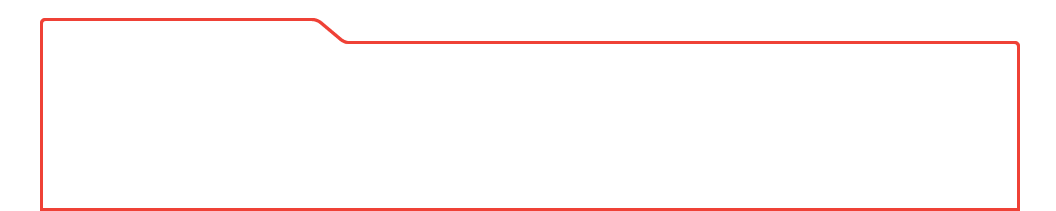
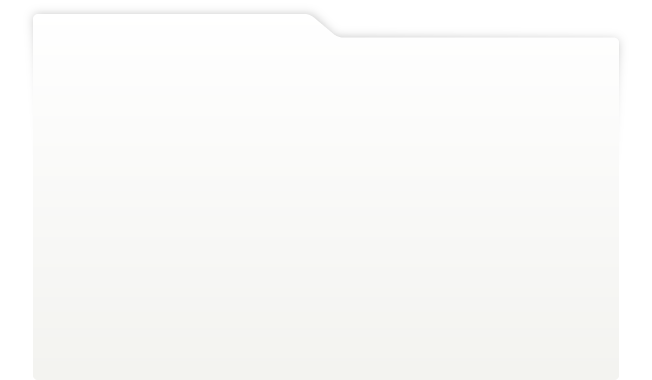
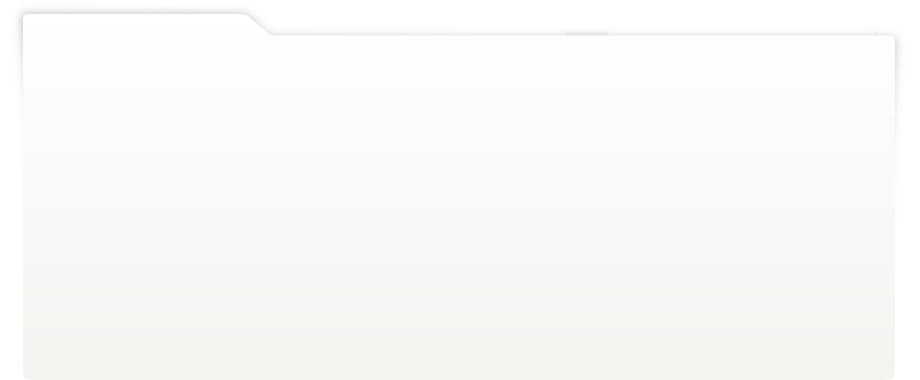
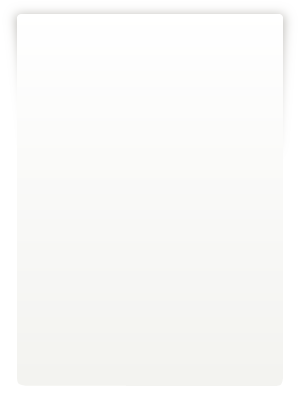
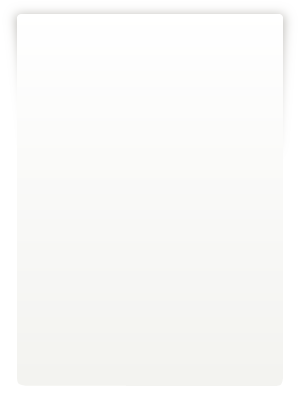
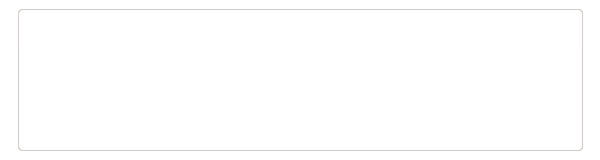
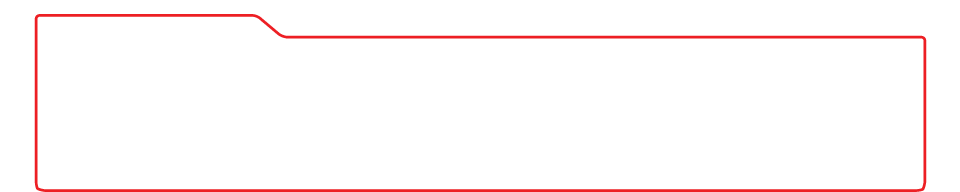
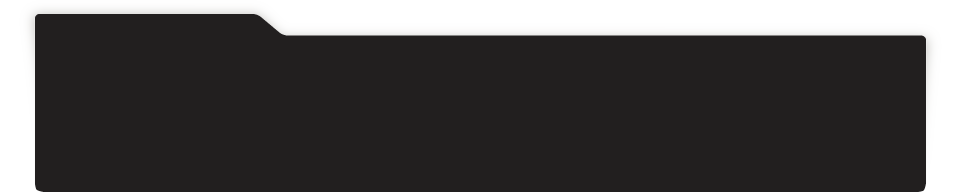
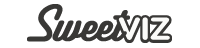
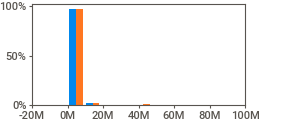
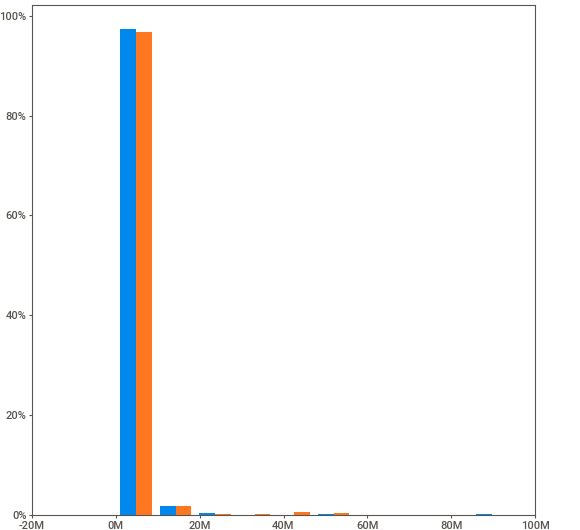
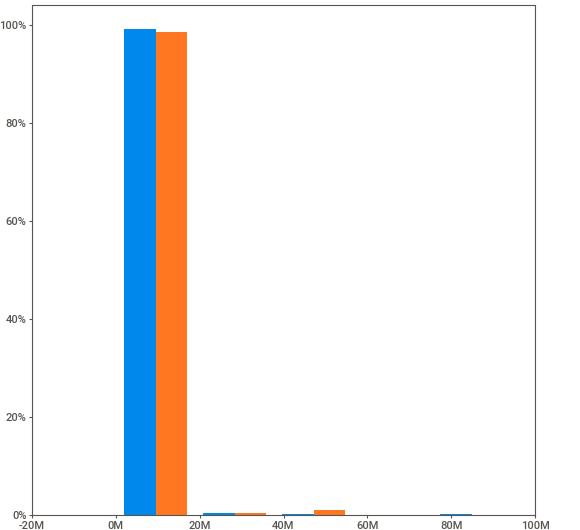
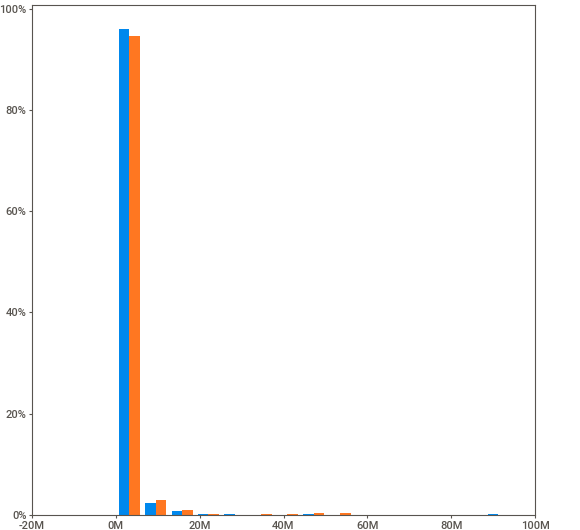
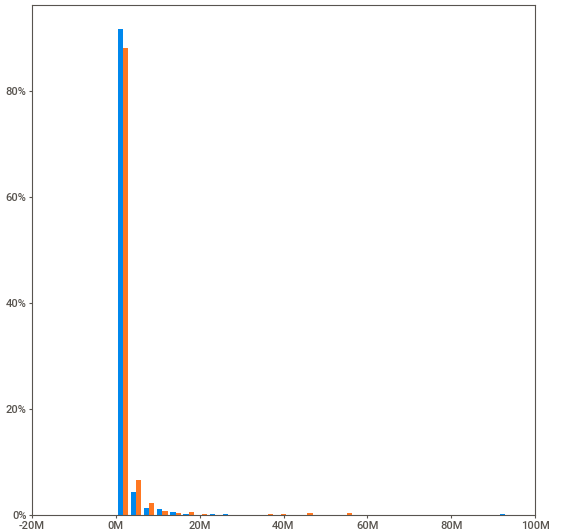
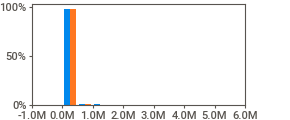
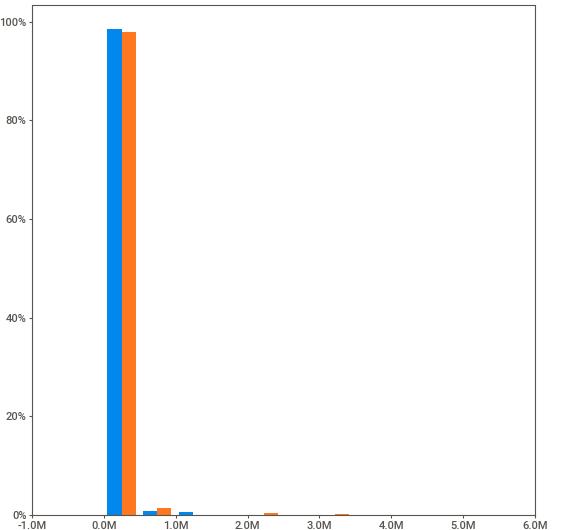
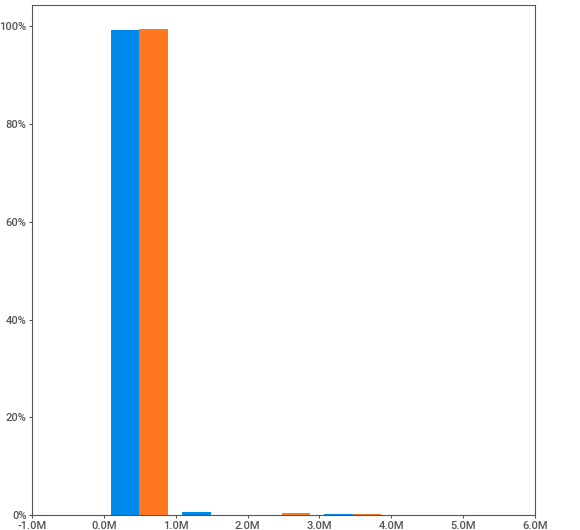
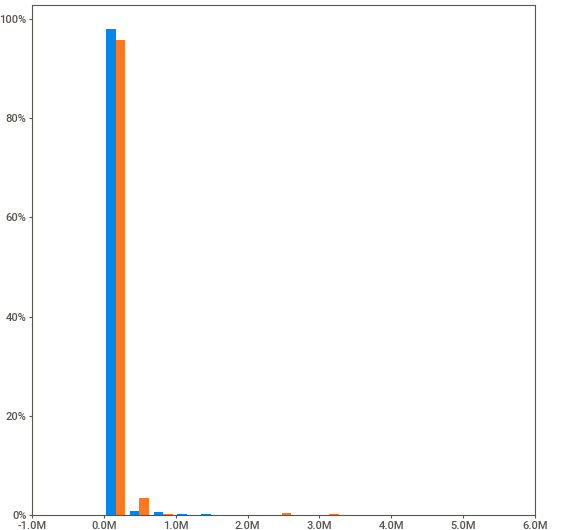
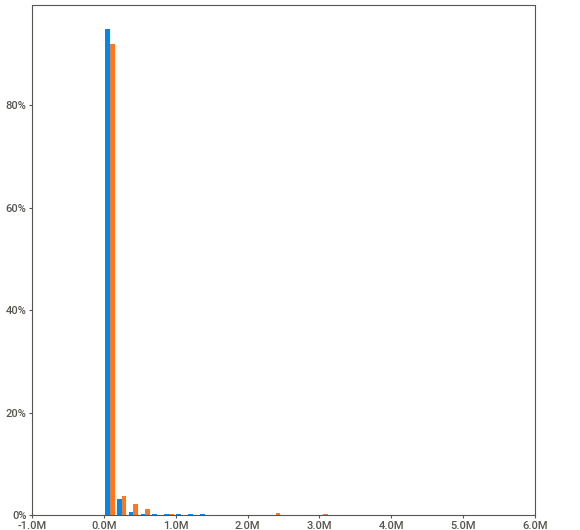
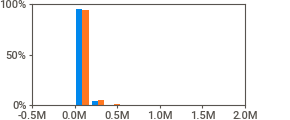
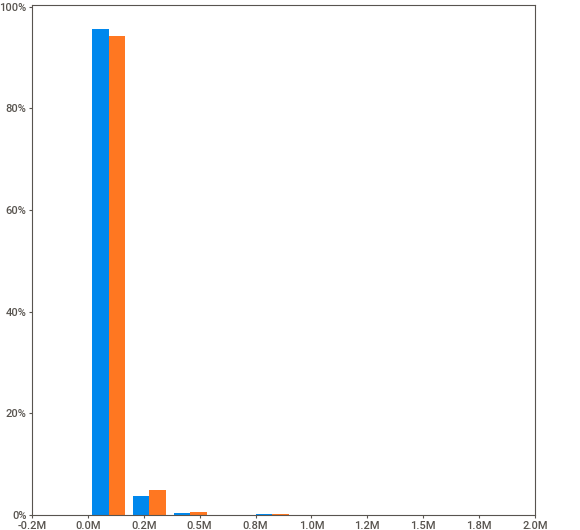
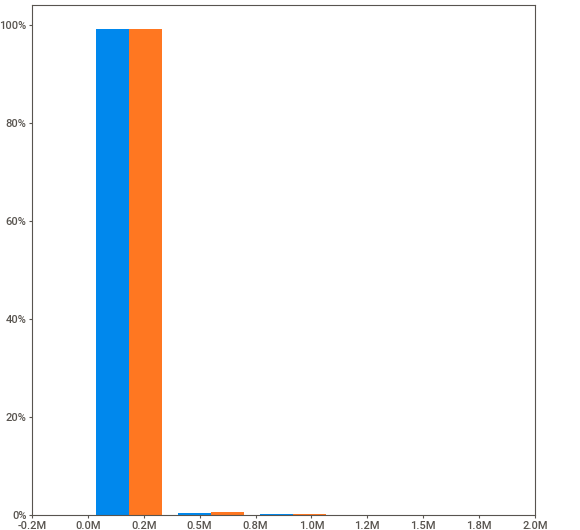
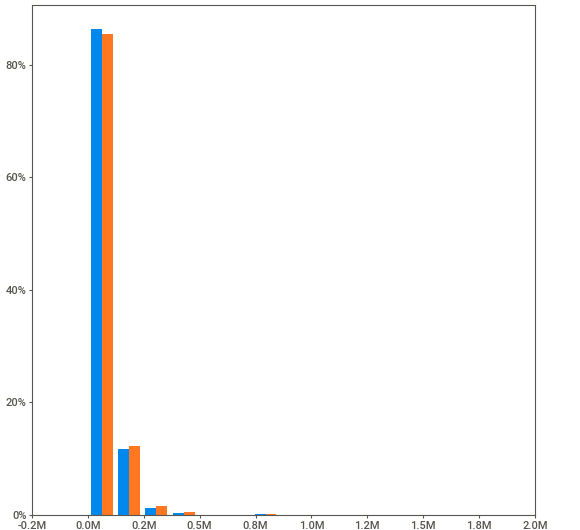
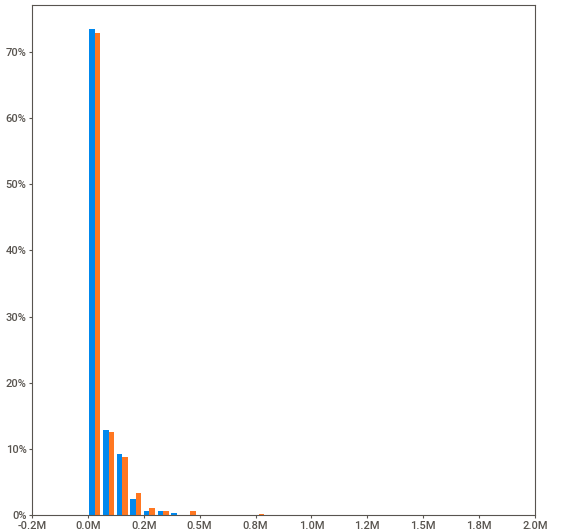
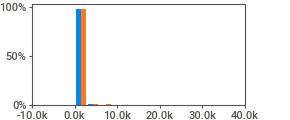
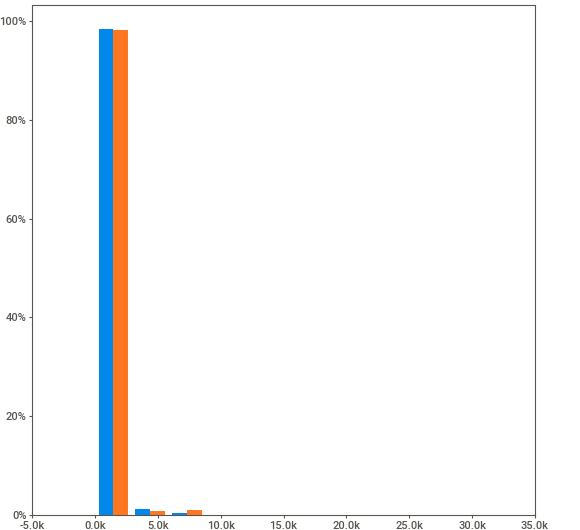
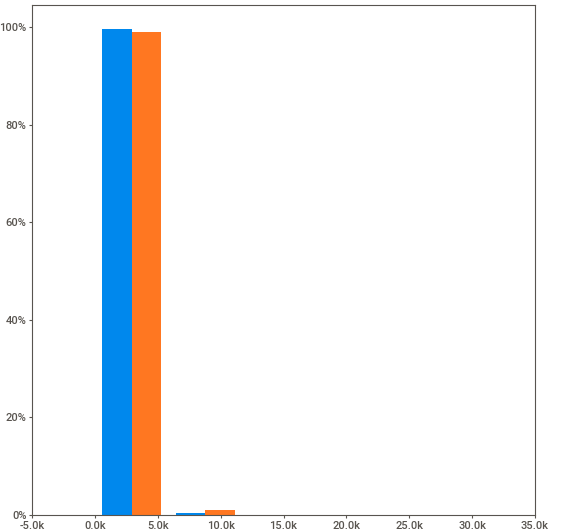
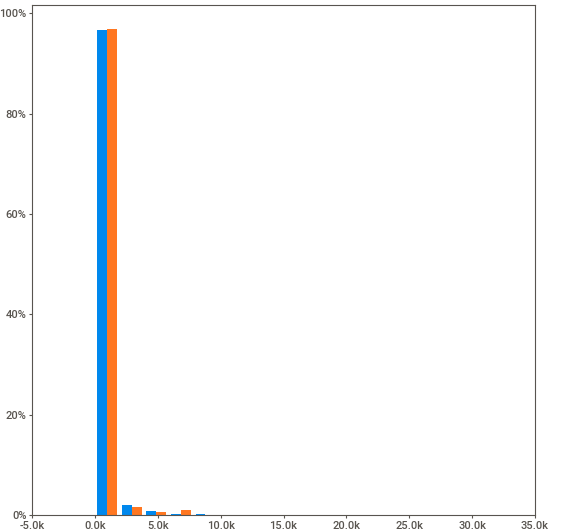
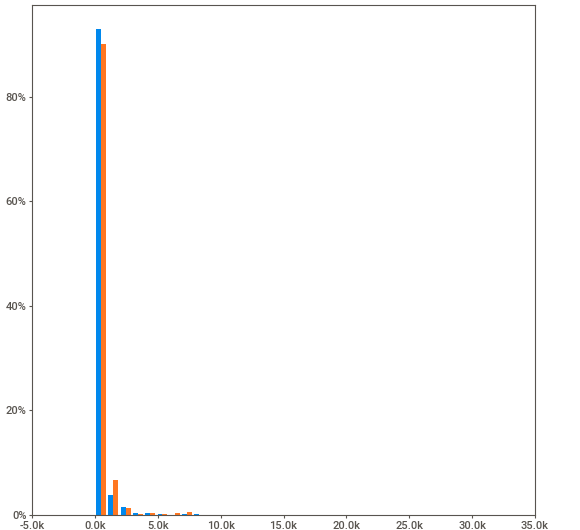
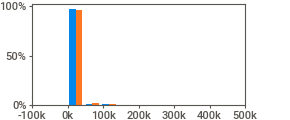
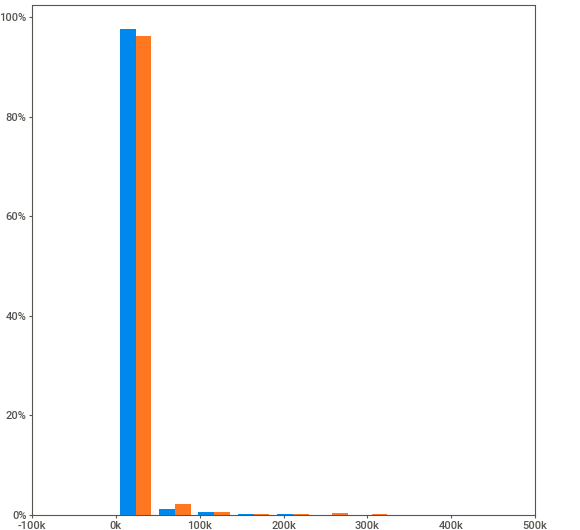
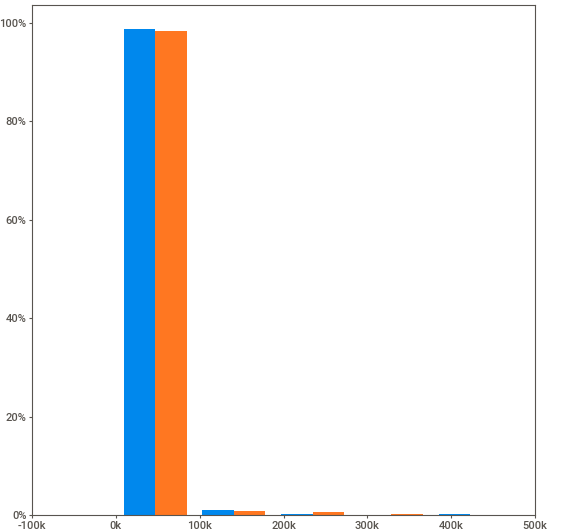
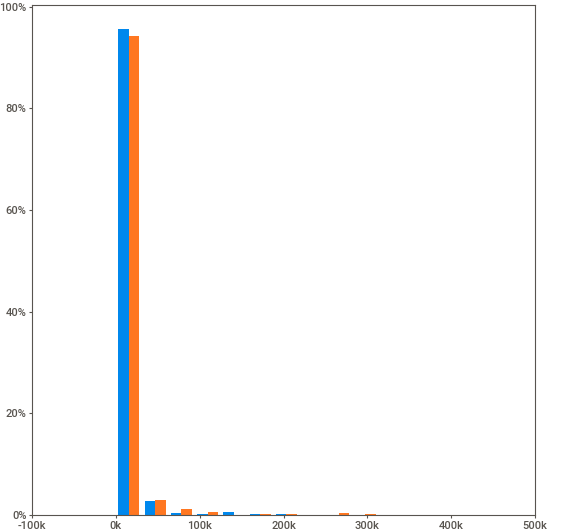
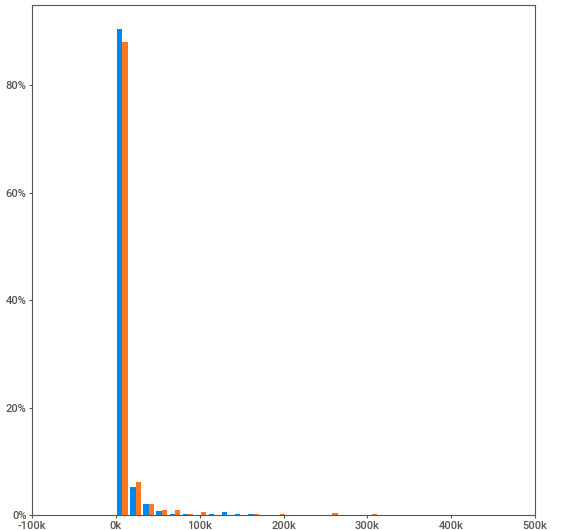
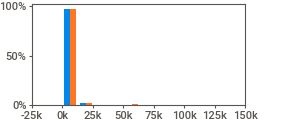
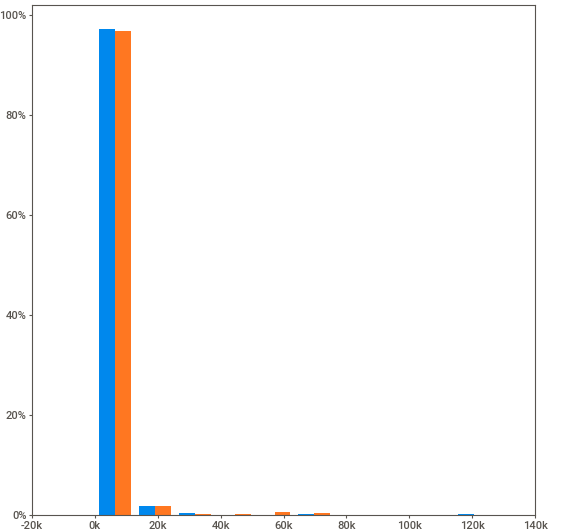
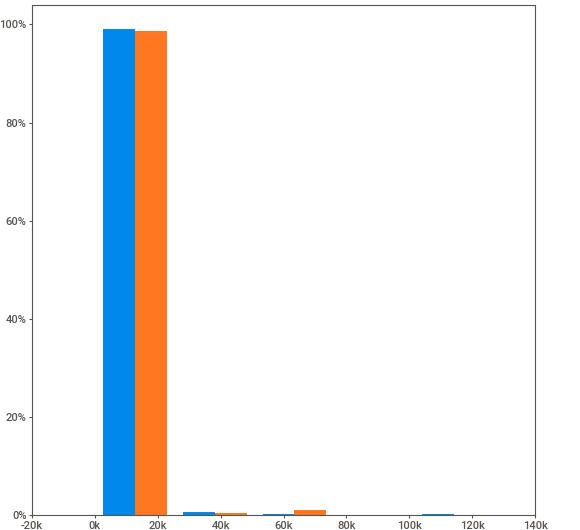
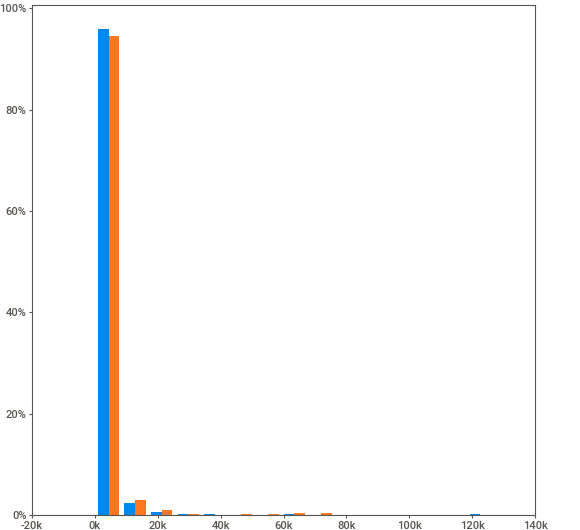
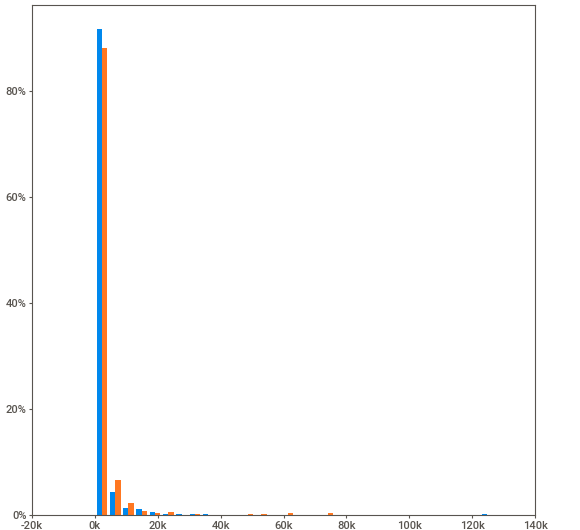
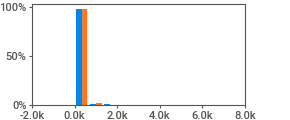
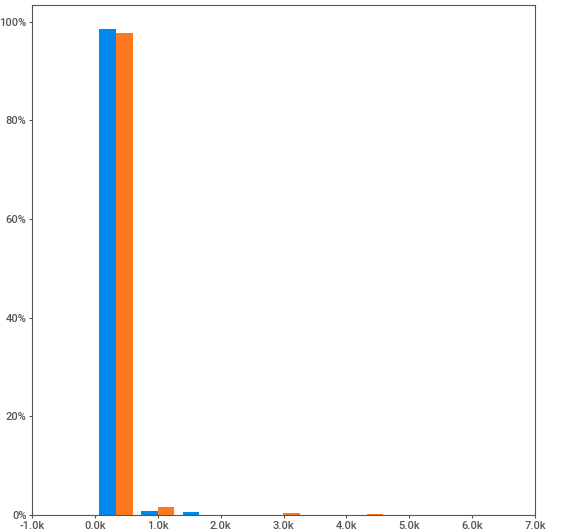
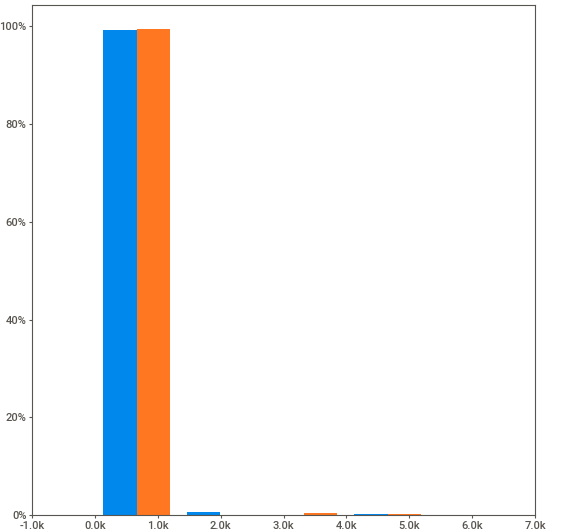
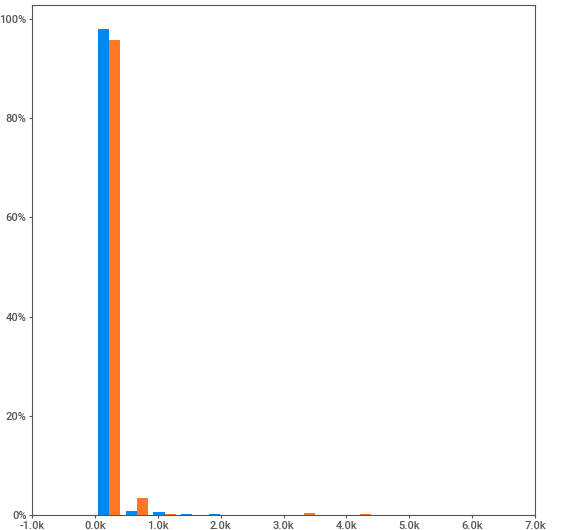
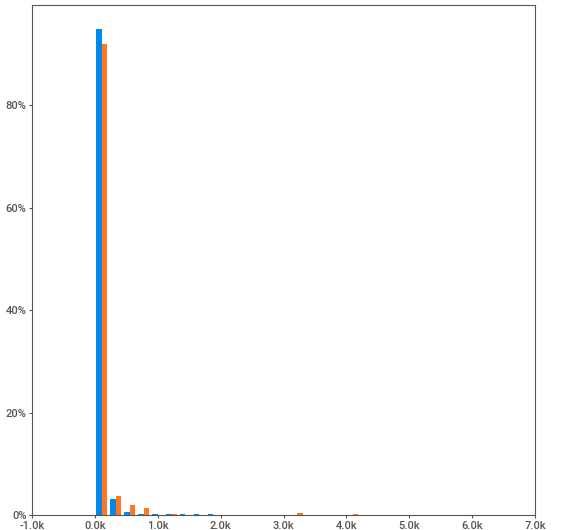
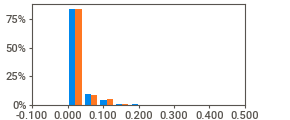
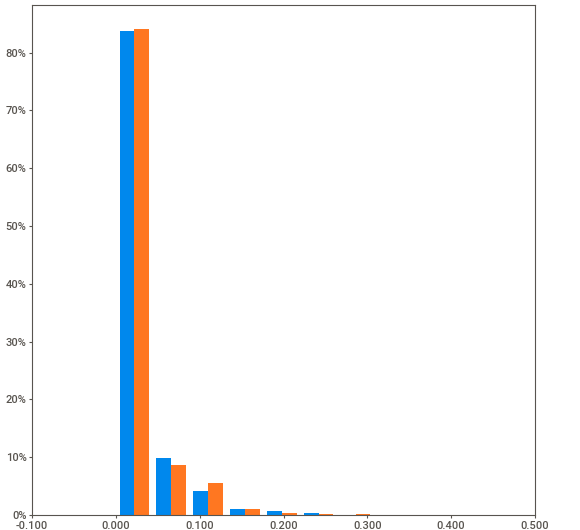
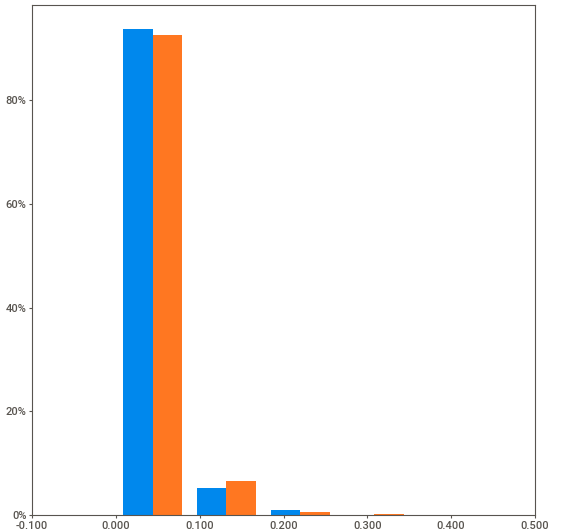
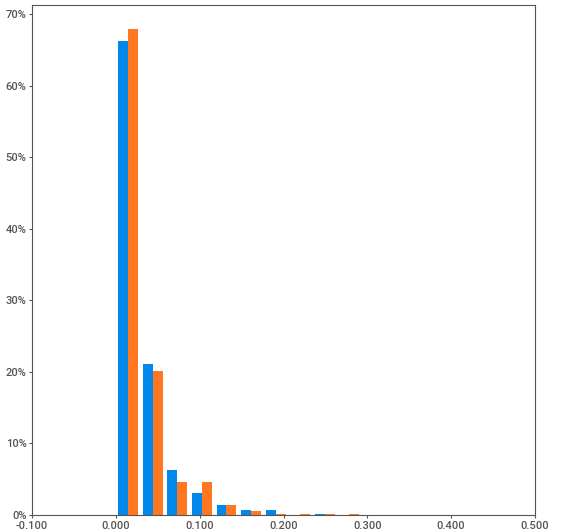
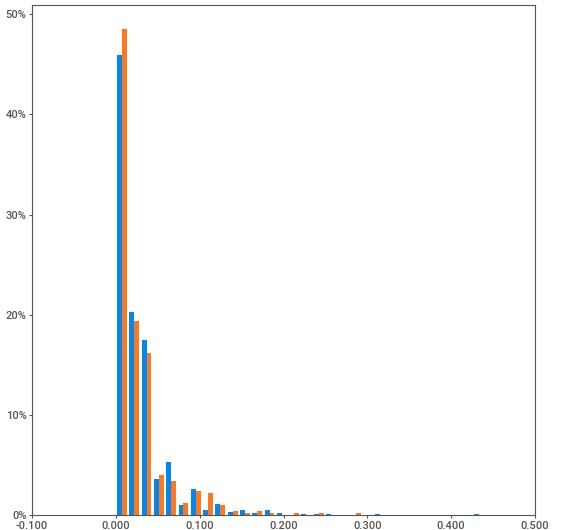
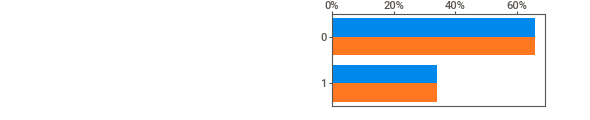
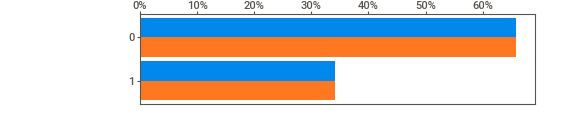
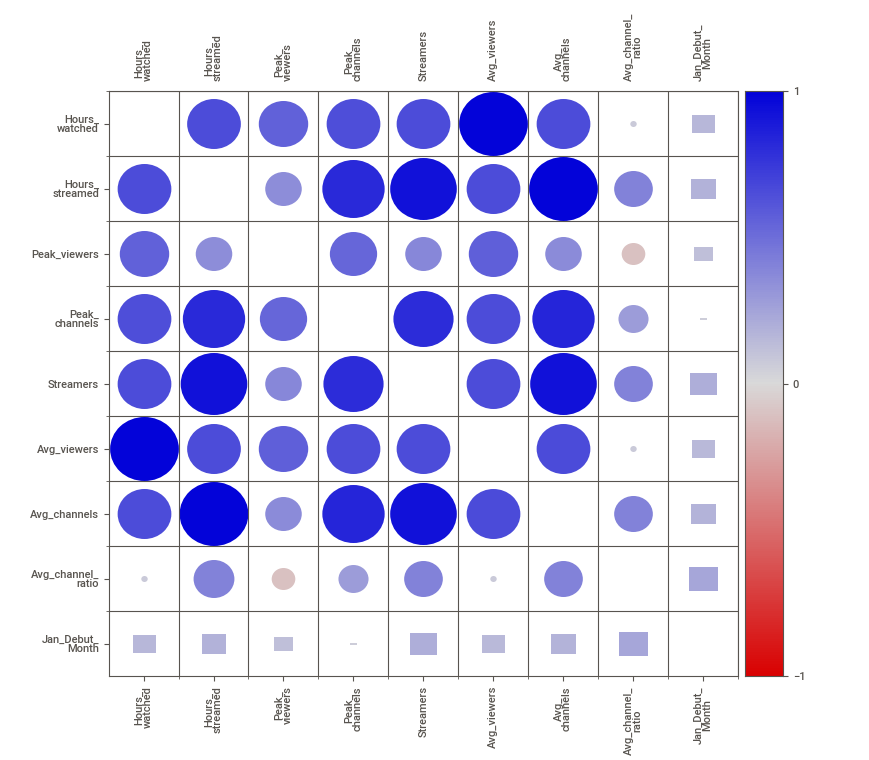
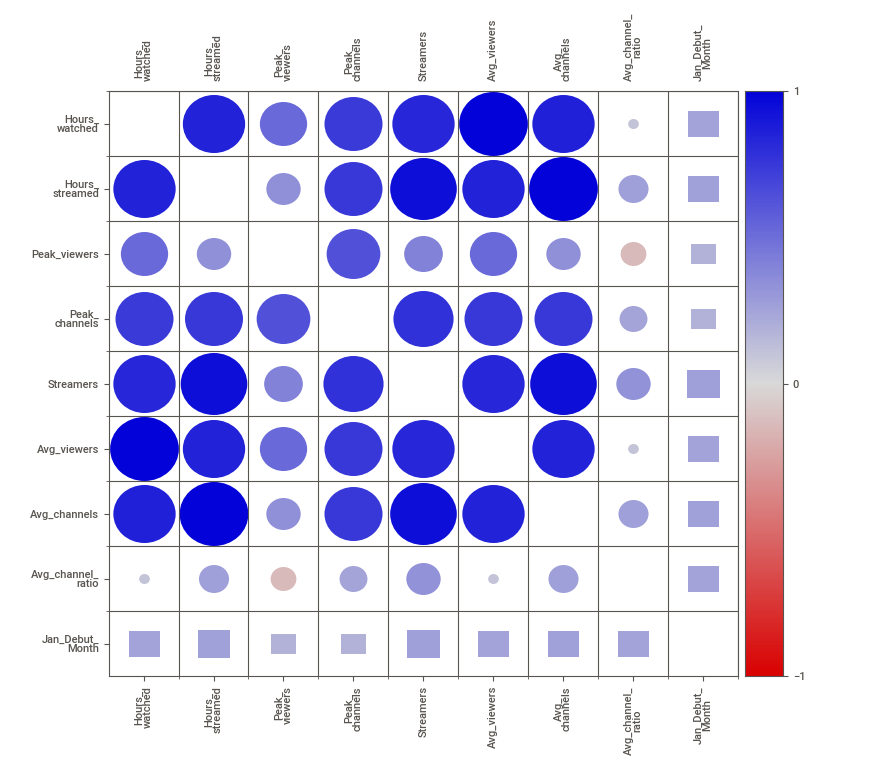

In [17]:
c_report.show_notebook(  w=None, 
                h=None, 
                scale=None,
                layout='widescreen',
                filepath=None)

In [18]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_train_scaled.head()

,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_channel_ratio,Jan_Debut_Month
0,-0.104183,-0.114826,-0.127525,0.018291,-0.076606,-0.100087,-0.110901,-0.195242,-0.720577
1,-0.264915,-0.207033,-0.153653,-0.278479,-0.234592,-0.264257,-0.204991,-0.195242,-0.720577
2,-0.236449,-0.058641,-0.593625,-0.190981,-0.110519,-0.237468,-0.060495,2.065569,1.387777
3,-0.271640,-0.212662,-0.519034,-0.282989,-0.264763,-0.268653,-0.211711,-0.195242,-0.720577
4,-0.245541,-0.214101,-0.095324,-0.261340,-0.260163,-0.246398,-0.215072,-0.477843,-0.720577


In [19]:
lr=LogisticRegression()
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [20]:
print("score on test: " + str(lr.score(X_test_scaled, y_test)))
print("score on train: "+ str(lr.score(X_train_scaled, y_train)))

score on test: 0.7964071856287425
score on train: 0.7321785476349101


In [21]:
y_pred_test_lr = lr.predict(X_test_scaled)
y_pred_train_lr = lr.predict(X_train_scaled)

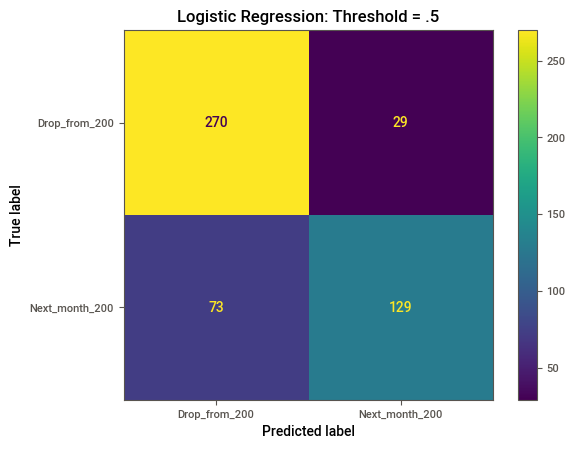

In [22]:
cm = confusion_matrix(y_test, y_pred_test_lr, labels = lr.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Drop_from_200', 'Next_month_200'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Drop_from_200', 'Next_month_200'], fontsize = 8)
ax.set_yticklabels(labels = ['Drop_from_200', 'Next_month_200'], fontsize = 8)
ax.set_title('Logistic Regression: Threshold = .5')
display_cm.plot(ax = ax)

In [23]:
'''Prediction based only on hours watched is not as good as logistic regression or Random Forest Classifier'''

'Prediction based only on hours watched is not as good as logistic regression or Random Forest Classifier'

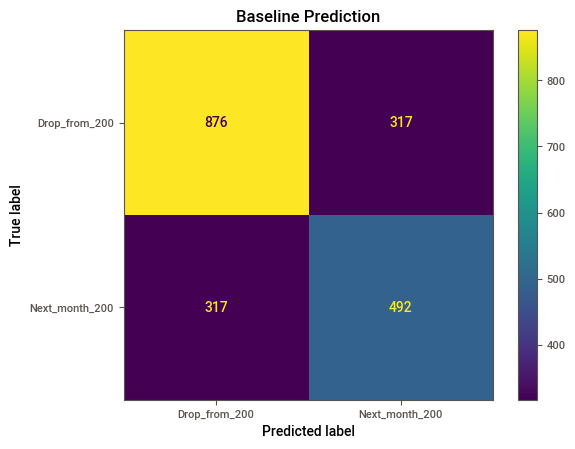

In [24]:
cm = confusion_matrix(baseline_df['Next_mth_200'], baseline_df['prediction'], labels = lr.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Drop_from_200', 'Next_month_200'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Drop_from_200', 'Next_month_200'], fontsize = 8)
ax.set_yticklabels(labels = ['Drop_from_200', 'Next_month_200'], fontsize = 8)
ax.set_title('Baseline Prediction')
display_cm.plot(ax = ax)

In [25]:
"Baseline Classification Report"

'Baseline Classification Report'

In [26]:
print(classification_report(baseline_df['Next_mth_200'], baseline_df['prediction']))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1193
           1       0.61      0.61      0.61       809

    accuracy                           0.68      2002
   macro avg       0.67      0.67      0.67      2002
weighted avg       0.68      0.68      0.68      2002



In [27]:
"Logistic Regression Classification Report"

'Logistic Regression Classification Report'

In [28]:
print(classification_report(y_test, y_pred_test_lr))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       299
           1       0.82      0.64      0.72       202

    accuracy                           0.80       501
   macro avg       0.80      0.77      0.78       501
weighted avg       0.80      0.80      0.79       501



In [29]:
y_pred_proba_lr = lr.predict_proba(X_test_scaled)[::,1]
fpr_lr, tpr_lr, _ = metrics.roc_curve(y_test,  y_pred_proba_lr)

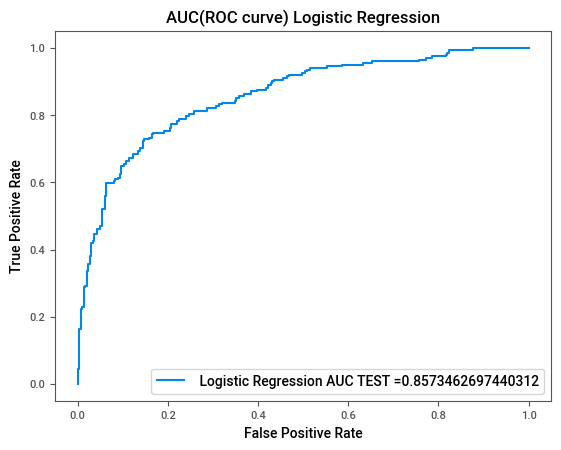

In [30]:
plt.plot(fpr_lr, tpr_lr, label=" Logistic Regression AUC TEST ="+str(auc(fpr_lr, tpr_lr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve) Logistic Regression")
plt.show()

In [31]:
y_pred_thresh = (lr.predict_proba(X_test_scaled)[:, 1] > .4).astype('float')

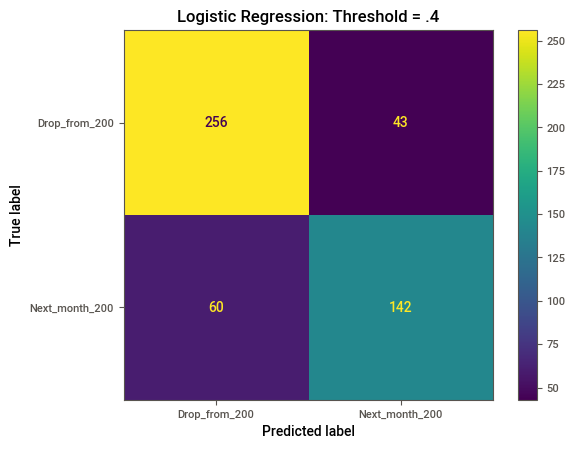

In [32]:
cm = confusion_matrix(y_test, y_pred_thresh, labels = lr.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Drop_from_200', 'Next_month_200'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Drop_from_200', 'Next_month_200'], fontsize = 8)
ax.set_yticklabels(labels = ['Drop_from_200', 'Next_month_200'], fontsize = 8)
ax.set_title('Logistic Regression: Threshold = .4')
display_cm.plot(ax = ax)

In [33]:
"Logistic Regression Threshold = .4"

'Logistic Regression Threshold = .4'

In [34]:
print(classification_report(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       299
           1       0.77      0.70      0.73       202

    accuracy                           0.79       501
   macro avg       0.79      0.78      0.78       501
weighted avg       0.79      0.79      0.79       501



In [35]:
rf = RandomForestClassifier(random_state = 1701)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=1701)

In [36]:
print("score on test: " + str(rf.score(X_test_scaled, y_test)))
print("score on train: "+ str(rf.score(X_train_scaled, y_train)))

score on test: 0.7844311377245509
score on train: 1.0


In [37]:
random_grid = {
 'max_depth': [3, 5, 7, 10, None],
 'min_samples_leaf': [5, 10, 50, 100],
 'n_estimators': [100],
 'random_state': [1701]}

In [38]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                               cv = 3, random_state=1701)

In [39]:
rf_random.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1701),
                   n_iter=100,
                   param_distributions={'max_depth': [3, 5, 7, 10, None],
                                        'min_samples_leaf': [5, 10, 50, 100],
                                        'n_estimators': [100],
                                        'random_state': [1701]},
                   random_state=1701)

In [40]:
print("score on test: " + str(rf_random.score(X_test_scaled, y_test)))
print("score on train: "+ str(rf_random.score(X_train_scaled, y_train)))

score on test: 0.7884231536926147
score on train: 0.8281145902731513


In [41]:
rf_random.best_params_


{'random_state': 1701,
 'n_estimators': 100,
 'min_samples_leaf': 5,
 'max_depth': 7}

In [42]:
param_grid = {
 'max_depth': [3, 5, 7, 10, None],
 'min_samples_leaf': [5, 10, 50, 100],
 'n_estimators': [100]}

In [43]:
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3)

In [44]:
rf_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1701),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [5, 10, 50, 100],
                         'n_estimators': [100]})

In [45]:
print("score on test: " + str(rf_grid.score(X_test_scaled, y_test)))
print("score on train: "+ str(rf_grid.score(X_train_scaled, y_train)))

score on test: 0.7884231536926147
score on train: 0.8281145902731513


In [46]:
rf_grid.best_params_

{'max_depth': 7, 'min_samples_leaf': 5, 'n_estimators': 100}

In [47]:
rf_nest_2000 = RandomForestClassifier(max_depth = 7, min_samples_leaf = 5, n_estimators = 2000, random_state = 1701)

In [48]:
rf_nest_2000.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=5, n_estimators=2000,
                       random_state=1701)

In [49]:
print("score on test: " + str(rf_nest_2000.score(X_test_scaled, y_test)))
print("score on train: "+ str(rf_nest_2000.score(X_train_scaled, y_train)))

score on test: 0.7844311377245509
score on train: 0.8294470353097935


In [50]:
importances = rf_nest_2000.feature_importances_

In [51]:
rf_importances = pd.Series(importances, index = X_test_scaled.columns)
rf_importances = rf_importances.sort_values(ascending = False)


In [52]:
rf_importances.head(10)

Hours_streamed       0.188407
Avg_channels         0.135082
Jan_Debut_Month      0.125935
Streamers            0.110867
Hours_watched        0.109794
Avg_viewers          0.106664
Peak_channels        0.103164
Peak_viewers         0.096147
Avg_channel_ratio    0.023941
dtype: float64

In [53]:
y_pred_proba_rf = rf_nest_2000.predict_proba(X_test_scaled)[::,1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test,  y_pred_proba_rf)

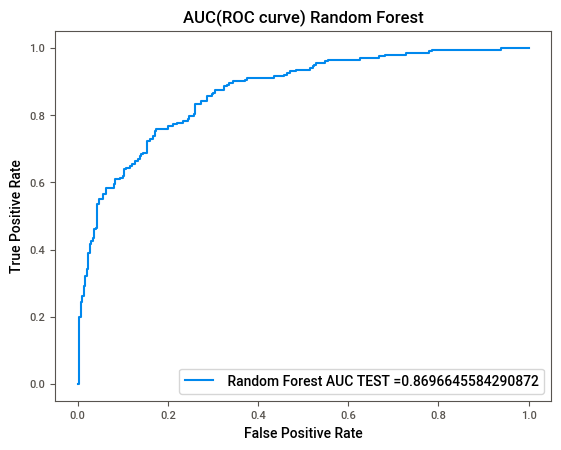

In [54]:
plt.plot(fpr_rf, tpr_rf, label=" Random Forest AUC TEST ="+str(auc(fpr_rf, tpr_rf)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve) Random Forest")
plt.show()

In [55]:
y_pred_test_rf = rf_grid.predict(X_test_scaled)

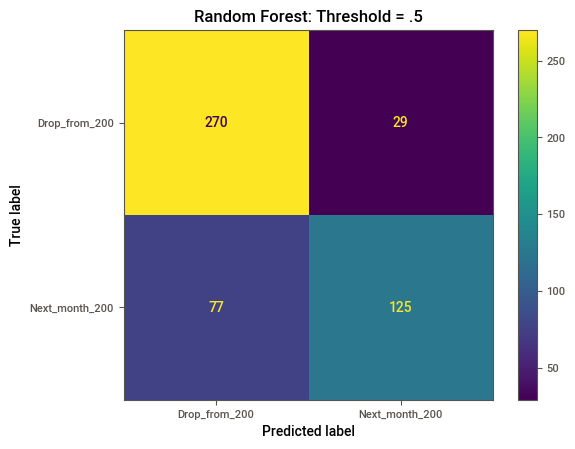

In [56]:
cm = confusion_matrix(y_test, y_pred_test_rf, labels = rf_grid.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Drop_from_200', 'Next_month_200'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Drop_from_200', 'Next_month_200'], fontsize = 8)
ax.set_yticklabels(labels = ['Drop_from_200', 'Next_month_200'], fontsize = 8)
ax.set_title('Random Forest: Threshold = .5')
display_cm.plot(ax = ax)

In [57]:
y_pred_thresh = (rf_grid.predict_proba(X_test_scaled)[:, 1] > .44).astype('float')

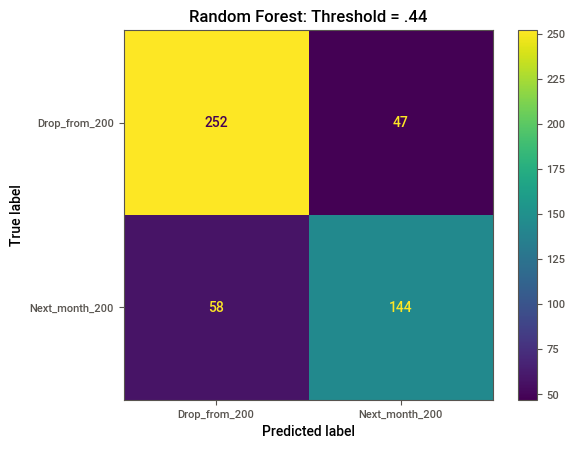

In [58]:
cm = confusion_matrix(y_test, y_pred_thresh, labels = lr.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Drop_from_200', 'Next_month_200'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Drop_from_200', 'Next_month_200'], fontsize = 8)
ax.set_yticklabels(labels = ['Drop_from_200', 'Next_month_200'], fontsize = 8)
ax.set_title('Random Forest: Threshold = .44')
display_cm.plot(ax = ax)

In [59]:
"Classification Report: Random Forest Threshold = .44"

'Classification Report: Random Forest Threshold = .44'

In [60]:
print(classification_report(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       299
           1       0.75      0.71      0.73       202

    accuracy                           0.79       501
   macro avg       0.78      0.78      0.78       501
weighted avg       0.79      0.79      0.79       501



In [61]:
twitch_df_X_3mth = twitch_df_X[twitch_df_X['Date'] < '2022-12-12']

In [62]:
twitch_df_X_3mth.tail()

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_channel_ratio,Date,one_month_future,three_month_future,six_month_future,Hours_watched_1mth,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200
2020,Ixion,12,2022,1035038,9529,47595,142,1251,1391.0,13.0,0.01,2022-12-01,2023-01-01,2023-03-01,2023-06-01,0,0,0,0,0
2021,Marvel's Midnight Suns,12,2022,1986127,54569,27336,290,5128,2670.0,73.0,0.03,2022-12-01,2023-01-01,2023-03-01,2023-06-01,0,0,0,0,0
2022,Project: Playtime,12,2022,699293,23731,141061,264,12707,940.0,32.0,0.03,2022-12-01,2023-01-01,2023-03-01,2023-06-01,0,0,0,0,0
2023,Stalcraft,12,2022,1461144,29178,11735,113,3980,1964.0,39.0,0.02,2022-12-01,2023-01-01,2023-03-01,2023-06-01,0,0,0,0,0
2024,The Callisto Protocol,12,2022,8703710,215971,267668,2598,37504,11699.0,290.0,0.02,2022-12-01,2023-01-01,2023-03-01,2023-06-01,0,0,0,0,0


In [63]:
twitch_df_X_3mth.count()

Game                  1922
Month                 1922
Year                  1922
Hours_watched         1922
Hours_streamed        1922
Peak_viewers          1922
Peak_channels         1922
Streamers             1922
Avg_viewers           1922
Avg_channels          1922
Avg_channel_ratio     1922
Date                  1922
one_month_future      1922
three_month_future    1922
six_month_future      1922
Hours_watched_1mth    1922
Hours_watched_3mth    1922
Hours_watched_6mth    1922
Jan_Debut_Month       1922
Next_mth_200          1922
dtype: int64

In [64]:
twitch_df_X_3mth.reset_index(drop = True, inplace = True)

In [65]:
twitch_df_X.head()

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_channel_ratio,Date,one_month_future,three_month_future,six_month_future,Hours_watched_1mth,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200
0,7 Days to Die,1,2016,269681,12131,4405,44,1240,362.0,16.0,0.04,2016-01-01,2016-02-01,2016-04-01,2016-07-01,139365,212199,2063116,1,1
1,Agar.io,1,2016,255617,20705,4183,74,4472,344.0,28.0,0.08,2016-01-01,2016-02-01,2016-04-01,2016-07-01,254146,198757,0,1,1
2,Age of Empires,1,2016,248884,232,107455,18,40,335.0,0.0,0.00,2016-01-01,2016-02-01,2016-04-01,2016-07-01,0,0,0,1,0
3,Alien: Isolation,1,2016,264294,11799,9590,42,3968,355.0,16.0,0.05,2016-01-01,2016-02-01,2016-04-01,2016-07-01,109754,122248,0,1,1
4,American Truck Simulator,1,2016,314055,724,43089,48,186,422.0,1.0,0.00,2016-01-01,2016-02-01,2016-04-01,2016-07-01,2134600,141057,0,1,1


In [66]:
x = len(twitch_df_X_3mth)
top200_list_3mth = []
for i in range(x):
    if twitch_df_X_3mth['Hours_watched_3mth'][i] != 0 and twitch_df_X_3mth['Hours_watched_1mth'][i] != 0:
        top200_list_3mth.append(1)
    else:
        top200_list_3mth.append(0)

In [67]:
twitch_df_X_3mth['three_mth_200'] = top200_list_3mth

In [68]:
len(twitch_df_X_3mth[twitch_df_X_3mth['Hours_watched_3mth'] != 0])

408

In [69]:
sum(top200_list_3mth)

373

In [70]:
base_3mth = twitch_df_X_3mth.sort_values(by = 'Hours_watched_1mth', ascending = False)

In [71]:
base_pred_3mth = [1]*408 + [0]*(1922-408)

In [72]:
base_3mth['prediction'] = base_pred_3mth

In [73]:
base_3mth.head(2)

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,...,one_month_future,three_month_future,six_month_future,Hours_watched_1mth,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200,three_mth_200,prediction
609,Lost Ark,1,2022,13020879,217772,68925,900,10145,17501.0,293.0,...,2022-02-01,2022-04-01,2022-07-01,145982931,25369445,17390017,1,1,1,1
76,League of Legends,1,2016,94377226,1362044,530270,2903,129172,126851.0,1831.0,...,2016-02-01,2016-04-01,2016-07-01,93154772,88389049,77871713,1,1,1,1


In [74]:
X_train, X_test, y_train, y_test = train_test_split(twitch_df_X_3mth.drop(columns=['Game', 'Month', 'Year', 'Date', 'one_month_future', 
                                                                              'three_month_future','six_month_future',
                                                                              'Hours_watched_3mth','Hours_watched_6mth', 'Next_mth_200', 
                                                                             'three_mth_200']), 
                                                    twitch_df_X_3mth.three_mth_200, test_size=0.25, stratify = twitch_df_X_3mth.three_mth_200,
                                                    random_state=1701)

In [75]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                               cv = 3, random_state=1701)

In [76]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1701),
                   n_iter=100,
                   param_distributions={'max_depth': [3, 5, 7, 10, None],
                                        'min_samples_leaf': [5, 10, 50, 100],
                                        'n_estimators': [100],
                                        'random_state': [1701]},
                   random_state=1701)

In [77]:
print("score on test: " + str(rf_random.score(X_test, y_test)))
print("score on train: "+ str(rf_random.score(X_train, y_train)))

score on test: 0.9293139293139293
score on train: 0.9368494101318529


In [78]:
rf_random.best_params_

{'random_state': 1701,
 'n_estimators': 100,
 'min_samples_leaf': 5,
 'max_depth': 7}

In [79]:
rf_3mth = RandomForestClassifier(max_depth = 7, min_samples_leaf = 5, n_estimators = 2000, random_state = 1701)

In [80]:
rf_3mth.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=5, n_estimators=2000,
                       random_state=1701)

In [81]:
'Baseline data for comparison in cell below'

'Baseline data for comparison in cell below'

In [82]:
print(classification_report(base_3mth['three_mth_200'], base_3mth['prediction']))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1549
           1       0.55      0.60      0.57       373

    accuracy                           0.83      1922
   macro avg       0.72      0.74      0.73      1922
weighted avg       0.83      0.83      0.83      1922



In [83]:
y_pred_test_3mth = rf_3mth.predict(X_test)

In [84]:
'Random Forest Model 3 month, assuming knowledge of hours watched 1 monht after debut'

'Random Forest Model 3 month, assuming knowledge of hours watched 1 monht after debut'

In [85]:
print(classification_report(y_test, y_pred_test_3mth))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       388
           1       0.84      0.75      0.80        93

    accuracy                           0.93       481
   macro avg       0.89      0.86      0.87       481
weighted avg       0.92      0.93      0.92       481



In [86]:
importances = rf_3mth.feature_importances_

In [87]:
rf_importances = pd.Series(importances, index = X_test.columns)
rf_importances = rf_importances.sort_values(ascending = False)

In [88]:
rf_importances

Hours_watched_1mth    0.372360
Jan_Debut_Month       0.229933
Hours_streamed        0.090612
Avg_channels          0.067006
Peak_viewers          0.058621
Streamers             0.042660
Hours_watched         0.040023
Peak_channels         0.039953
Avg_viewers           0.037301
Avg_channel_ratio     0.021532
dtype: float64

In [89]:
twitch_df_X_6mth = twitch_df_X[twitch_df_X['Date'] < '2022-09-01']

In [90]:
twitch_df_X_6mth.reset_index(drop = True, inplace = True)

In [91]:
x = len(twitch_df_X_6mth)
top200_list_6mth = []
for i in range(x):
    if twitch_df_X_6mth['Hours_watched_3mth'][i] != 0:
        top200_list_6mth.append(1)
    else:
        top200_list_6mth.append(0)

In [92]:
twitch_df_X_6mth['six_mth_200'] = top200_list_6mth

In [93]:
base_6mth = twitch_df_X_6mth.sort_values('Hours_watched_3mth', ascending = False)

In [94]:
x = sum(top200_list_6mth)
x

407

In [95]:
y = len(top200_list_6mth) - x
y

1458

In [96]:
base_pred_6mth = [1]*x + [0]*y

In [97]:
base_6mth['prediction'] = base_pred_6mth

In [98]:
'''Both baseline and model make perfect predictions at 6 months from debut, assuming knowledge of hours 
watched 3 months from debut'''

'Both baseline and model make perfect predictions at 6 months from debut, assuming knowledge of hours \nwatched 3 months from debut'

In [99]:
print(classification_report(base_6mth['six_mth_200'], base_6mth['prediction']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1458
           1       1.00      1.00      1.00       407

    accuracy                           1.00      1865
   macro avg       1.00      1.00      1.00      1865
weighted avg       1.00      1.00      1.00      1865



In [100]:
X_train, X_test, y_train, y_test = train_test_split(twitch_df_X_6mth.drop(columns=['Game', 'Month', 'Year', 'Date', 'one_month_future', 
                                                                              'three_month_future','six_month_future',
                                                                              'Hours_watched_6mth', 'Next_mth_200', 
                                                                             'six_mth_200']), 
                                                    twitch_df_X_6mth.six_mth_200, test_size=0.25, stratify = twitch_df_X_6mth.six_mth_200,
                                                    random_state=1701)

In [101]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                               cv = 3, random_state=1701)

In [102]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1701),
                   n_iter=100,
                   param_distributions={'max_depth': [3, 5, 7, 10, None],
                                        'min_samples_leaf': [5, 10, 50, 100],
                                        'n_estimators': [100],
                                        'random_state': [1701]},
                   random_state=1701)

In [103]:
print("score on test: " + str(rf_random.score(X_test, y_test)))
print("score on train: "+ str(rf_random.score(X_train, y_train)))

score on test: 1.0
score on train: 1.0


In [104]:
'''Data sets starts at Jan 2016, therefore I wanted to test any oddities of games debuting in Jan 2016. 
I removed the data from January of 2016 and ran a model to test accuracy. Some decrease in accuracy is expected
due to loss of data. But signficant difference would be worrying'''

'Data sets starts at Jan 2016, therefore I wanted to test any oddities of games debuting in Jan 2016. \nI removed the data from January of 2016 and ran a model to test accuracy. Some decrease in accuracy is expected\ndue to loss of data. But signficant difference would be worrying'

In [105]:
no_Jan2016 = twitch_df_X[twitch_df_X['Date'] != '2016-01-01']
no_Jan2016.head(2)

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_channel_ratio,Date,one_month_future,three_month_future,six_month_future,Hours_watched_1mth,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200
200,ARK: Survival Evolved,1,2017,2167646,192501,18756,483,24488,2914.0,259.0,0.09,2017-01-01,2017-02-01,2017-04-01,2017-07-01,1830475,1070666,1259946,1,1
201,ASTRONEER,1,2017,761112,21225,29721,72,4782,1023.0,29.0,0.03,2017-01-01,2017-02-01,2017-04-01,2017-07-01,0,0,0,1,0


In [106]:
X_train, X_test, y_train, y_test = train_test_split(no_Jan2016.drop(columns=['Game', 'Month', 'Year', 'Date', 'one_month_future', 
                                                                              'three_month_future','six_month_future',
                                                                              'Hours_watched_3mth', 'Hours_watched_1mth',
                                                                              'Hours_watched_6mth', 'Next_mth_200']), 
                                                    no_Jan2016.Next_mth_200, test_size=0.25, stratify = no_Jan2016.Next_mth_200,
                                                    random_state=1701)

In [107]:
rf_noJan2016 = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3)

In [108]:
rf_noJan2016.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1701),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [5, 10, 50, 100],
                         'n_estimators': [100]})

In [109]:
rf_noJan2016.best_params_

{'max_depth': 7, 'min_samples_leaf': 10, 'n_estimators': 100}

In [110]:
rf_noJan2016 = RandomForestClassifier(max_depth = 7, min_samples_leaf = 10, n_estimators = 100, random_state = 1701)

In [111]:
rf_noJan2016.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=10, random_state=1701)

In [112]:
'''The accuracy score below is enough to determine that there is no great oddities in the data resulting from using Jan 2016
as a debut month, despite this likely being not a true debut month for many of the games on this list'''

'The accuracy score below is enough to determine that there is no great oddities in the data resulting from using Jan 2016\nas a debut month, despite this likely being not a true debut month for many of the games on this list'

In [113]:
print("score on test: " + str(rf_noJan2016.score(X_test, y_test)))
print("score on train: "+ str(rf_noJan2016.score(X_train, y_train)))

score on test: 0.7516629711751663
score on train: 0.8016284233900814


In [114]:
'''I do not have data from this dataset before they entered the top 200. However, I can attempt to predict the hours watched 
from the debut month to the next. I have already attempted to predict the zeroes. So this will attempt the hours watched for
games that were in the top 200 2 months in a row.'''

'I do not have data from this dataset before they entered the top 200. However, I can attempt to predict the hours watched \nfrom the debut month to the next. I have already attempted to predict the zeroes. So this will attempt the hours watched for\ngames that were in the top 200 2 months in a row.'

In [115]:
noz_df = twitch_df_X[twitch_df_X['Hours_watched_1mth'] != 0]

In [116]:
noz_df.head(2)

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_channel_ratio,Date,one_month_future,three_month_future,six_month_future,Hours_watched_1mth,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200
0,7 Days to Die,1,2016,269681,12131,4405,44,1240,362.0,16.0,0.04,2016-01-01,2016-02-01,2016-04-01,2016-07-01,139365,212199,2063116,1,1
1,Agar.io,1,2016,255617,20705,4183,74,4472,344.0,28.0,0.08,2016-01-01,2016-02-01,2016-04-01,2016-07-01,254146,198757,0,1,1


In [117]:
def regression_metrics(y_true, y_pred):
    meanAbErr = metrics.mean_absolute_error(y_true, y_pred)
    meanSqErr = metrics.mean_squared_error(y_true, y_pred)
    rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    print('R squared:', r2)
    print('Mean Absolute Error:', meanAbErr)
    print('Mean Square Error:', meanSqErr)
    print('Root Mean Square Error:', rootMeanSqErr)
    print('Mean Absolute Percentage Error:', mape)

In [118]:
base_noz = noz_df

In [119]:
base_noz['1mth_diff'] = base_noz['Hours_watched_1mth'] - base_noz['Hours_watched']

In [120]:
base_noz['1mth_diff'].median()

-154576.0

In [121]:
base_noz['prediction'] = base_noz['Hours_watched'] + base_noz['1mth_diff'].median()

In [122]:
x = noz_df.drop(columns=['Game', 'Month', 'Year', 'Date', 'one_month_future', 
                                                                              'three_month_future','six_month_future',
                                                                              'Hours_watched_3mth', 'Hours_watched_6mth',
                                                                              'Hours_watched_1mth', 'Next_mth_200', '1mth_diff',
                                                                               'prediction'])
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    noz_df.Hours_watched_1mth, test_size=0.25, random_state=1701)

In [123]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_train_scaled.head()

,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_channel_ratio,Jan_Debut_Month
0,-0.256115,-0.319352,-0.272180,-0.330505,-0.403433,-0.256848,-0.314875,-0.696471,-1.013290
1,-0.274355,-0.294672,0.224038,-0.317495,-0.339295,-0.270921,-0.290400,-0.696471,-1.013290
2,-0.297519,-0.115383,-0.270431,0.295254,-0.201768,-0.297627,-0.116351,1.572676,-1.013290
3,-0.121909,-0.240355,0.615694,-0.237486,-0.194920,-0.124755,-0.238729,-0.696471,0.986885
4,-0.286662,-0.053396,-0.602511,-0.247894,-0.145063,-0.286944,-0.056522,1.856319,0.986885


In [124]:
mlr = LinearRegression()

In [125]:
mlr.fit(X_train_scaled, y_train)

LinearRegression()

In [126]:
y_pred_mlr= mlr.predict(X_test_scaled)

In [127]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
1034,3650194,1.284378e+06
588,660872,1.815900e+06
177,374856,1.011095e+06
303,166134,9.003614e+05
77,222387,-3.527278e+05


In [128]:
mlr_diff[mlr_diff['Actual value'] == 166134]

,Actual value,Predicted value
303,166134,900361.381195


In [129]:
'LINEAR REGRESSION ERROR 1MTH'

'LINEAR REGRESSION ERROR 1MTH'

In [130]:
regression_metrics(y_test, y_pred_mlr)

R squared: 0.8614466325510282
Mean Absolute Error: 1739331.4483022653
Mean Square Error: 13219782147464.99
Root Mean Square Error: 3635901.834134826
Mean Absolute Percentage Error: 1.865316741614535


In [131]:
rfr = RandomForestRegressor(random_state=1701)

In [132]:
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=1701)

In [133]:
'BASELINE PREDICTION MEDIAN ADJUSTED 1MTH'

'BASELINE PREDICTION MEDIAN ADJUSTED 1MTH'

In [134]:
regression_metrics(base_noz['Hours_watched_1mth'], base_noz['prediction'])

R squared: 0.37027697052803776
Mean Absolute Error: 1688917.0914709517
Mean Square Error: 43763070775200.21
Root Mean Square Error: 6615366.261606398
Mean Absolute Percentage Error: 1.1493906419960174


In [135]:
'BASELINE PREDICTION HOURS WATCHED 1MTH'

'BASELINE PREDICTION HOURS WATCHED 1MTH'

In [136]:
regression_metrics(base_noz['Hours_watched_1mth'], base_noz['Hours_watched'])

R squared: 0.3677506871227991
Mean Absolute Error: 1715592.5624227442
Mean Square Error: 43938636721318.42
Root Mean Square Error: 6628622.535739867
Mean Absolute Percentage Error: 1.2059516193213438


In [137]:
y_pred_rfr= rfr.predict(X_test)

In [138]:
'RANDOM FOREST REGRESSOR NO HYPERPARAMETER TUNING 1MTH'

'RANDOM FOREST REGRESSOR NO HYPERPARAMETER TUNING 1MTH'

In [139]:
regression_metrics(y_test, y_pred_rfr)

R squared: 0.5671329052615027
Mean Absolute Error: 1686210.8654187194
Mean Square Error: 41301115928175.06
Root Mean Square Error: 6426594.426924346
Mean Absolute Percentage Error: 1.0505119050983787


In [140]:
random_grid = {'max_depth': [3, 5, 7, 10, None],
 'min_samples_leaf': [5, 10, 50, 100],
 'n_estimators': [100]}

In [141]:
rfr = RandomForestRegressor(random_state = 1701)
rfr_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 100, cv = 3, random_state=1701)

In [142]:
rfr_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1701),
                   n_iter=100,
                   param_distributions={'max_depth': [3, 5, 7, 10, None],
                                        'min_samples_leaf': [5, 10, 50, 100],
                                        'n_estimators': [100]},
                   random_state=1701)

In [143]:
rfr_random.best_params_

{'n_estimators': 100, 'min_samples_leaf': 50, 'max_depth': 5}

In [144]:
'Both Random Search and Grid Search are worse than the base model by a lot'

'Both Random Search and Grid Search are worse than the base model by a lot'

In [145]:
y_pred_rfr_rand = rfr_random.predict(X_test)

In [146]:
'RANDOM SEARCH RANDOM FOREST REGRESSOR 1 MONTH'

'RANDOM SEARCH RANDOM FOREST REGRESSOR 1 MONTH'

In [147]:
regression_metrics(y_test, y_pred_rfr_rand)

R squared: 0.23314171444331955
Mean Absolute Error: 2653188.873840058
Mean Square Error: 73168192586668.47
Root Mean Square Error: 8553840.809055805
Mean Absolute Percentage Error: 1.382616976585178


In [148]:
rfr = RandomForestRegressor(random_state = 1701)
rfr_grid = GridSearchCV(estimator = rfr, param_grid = random_grid, cv = 3)

In [149]:
rfr_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1701),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [5, 10, 50, 100],
                         'n_estimators': [100]})

In [150]:
rfr_grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 50, 'n_estimators': 100}

In [151]:
rfr_best = RandomForestRegressor(max_depth = 5, min_samples_leaf = 50, n_estimators = 2000, random_state = 1701)

In [152]:
rfr_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=50, n_estimators=2000,
                      random_state=1701)

In [153]:
y_pred = rfr_best.predict(X_test)

In [154]:
'GRID SEARCH RANDOM FOREST REGRESSOR 1MTH'

'GRID SEARCH RANDOM FOREST REGRESSOR 1MTH'

In [155]:
regression_metrics(y_test, y_pred)

R squared: 0.23012074742000344
Mean Absolute Error: 2638048.6302234423
Mean Square Error: 73456431888666.11
Root Mean Square Error: 8570672.779231869
Mean Absolute Percentage Error: 1.3689547937881816


In [156]:
'''Note: there are 35 games that dropped out of the top 200 after its debut month and re-entered the top 200 by the 
third month post-debut. These were removed from the below regression, despite being left in for the classification models. 
This is because these would have a less significant detrimental impact on the classification models as compared 
to the regression models'''

'Note: there are 35 games that dropped out of the top 200 after its debut month and re-entered the top 200 by the \nthird month post-debut. These were removed from the below regression, despite being left in for the classification models. \nThis is because these would have a less significant detrimental impact on the classification models as compared \nto the regression models'

In [157]:
noz_df_3mth = noz_df[noz_df['Hours_watched_3mth'] != 0] 

In [158]:
noz_df_3mth.head(2)

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,...,one_month_future,three_month_future,six_month_future,Hours_watched_1mth,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200,1mth_diff,prediction
0,7 Days to Die,1,2016,269681,12131,4405,44,1240,362.0,16.0,...,2016-02-01,2016-04-01,2016-07-01,139365,212199,2063116,1,1,-130316,115105.0
1,Agar.io,1,2016,255617,20705,4183,74,4472,344.0,28.0,...,2016-02-01,2016-04-01,2016-07-01,254146,198757,0,1,1,-1471,101041.0


In [159]:
x = noz_df_3mth.drop(columns=['Game', 'Month', 'Year', 'Date', 'one_month_future', 
                                                                              'three_month_future','six_month_future',
                                                                              'Hours_watched_3mth', 'Hours_watched_6mth',
                                                                              'Next_mth_200', '1mth_diff',
                                                                               'prediction'])
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    noz_df_3mth.Hours_watched_3mth, test_size=0.25, random_state=1701)

In [160]:
rfr_3mth = RandomForestRegressor(random_state=1701)

In [161]:
rfr_3mth.fit(X_train, y_train)

RandomForestRegressor(random_state=1701)

In [162]:
y_pred_3mth = rfr_3mth.predict(X_test)

In [163]:
'RANDOM FOREST REGRESSOR NO HYPERPARAMETER TUNING 3MTH'

'RANDOM FOREST REGRESSOR NO HYPERPARAMETER TUNING 3MTH'

In [164]:
regression_metrics(y_test, y_pred_3mth)

R squared: 0.7051466808776836
Mean Absolute Error: 1907322.8861702129
Mean Square Error: 38443938361033.0
Root Mean Square Error: 6200317.601625985
Mean Absolute Percentage Error: 1.0691427019060757


In [165]:
rfr_3mth = RandomForestRegressor(random_state = 1701)
rfr_grid_3mth = GridSearchCV(estimator = rfr_3mth, param_grid = random_grid, cv = 3)

In [166]:
rfr_grid_3mth.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1701),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [5, 10, 50, 100],
                         'n_estimators': [100]})

In [167]:
rfr_grid_3mth.best_params_

{'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 100}

In [168]:
rfr_3mth_best = RandomForestRegressor(max_depth = None, min_samples_leaf = 5, n_estimators = 2000, random_state = 1701)

In [169]:
rfr_3mth_best.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=5, n_estimators=2000, random_state=1701)

In [170]:
y_pred_3mth = rfr_3mth_best.predict(X_test)

In [171]:
'GRID SEARCH RANDOM FOREST REGRESSOR 3MTH (Hypertuned)'

'GRID SEARCH RANDOM FOREST REGRESSOR 3MTH (Hypertuned)'

In [172]:
regression_metrics(y_test, y_pred_3mth)

R squared: 0.8531625556715074
Mean Absolute Error: 1603924.510778259
Mean Square Error: 19145145374858.13
Root Mean Square Error: 4375516.583771353
Mean Absolute Percentage Error: 1.2010760178743987


In [173]:
base_noz_3mth = noz_df_3mth

In [174]:
base_noz_3mth['3mth_diff'] = base_noz['Hours_watched_3mth'] - base_noz['Hours_watched_1mth']

In [175]:
base_noz_3mth['3mth_diff'].median()

-41334.0

In [176]:
base_noz_3mth['prediction'] = base_noz_3mth['Hours_watched'] + base_noz_3mth['1mth_diff'].median()

In [177]:
'BASELINE PREDICTION MEDIAN BASED'

'BASELINE PREDICTION MEDIAN BASED'

In [178]:
regression_metrics(base_noz_3mth['Hours_watched_3mth'], base_noz_3mth['prediction'])

R squared: 0.5578602703505053
Mean Absolute Error: 2348520.4718498657
Mean Square Error: 65311764264878.28
Root Mean Square Error: 8081569.41842847
Mean Absolute Percentage Error: 1.4938274267888494


In [179]:
'BASELINE PREDICTION 3MTH HOURS WATCHED'

'BASELINE PREDICTION 3MTH HOURS WATCHED'

In [180]:
regression_metrics(base_noz_3mth['Hours_watched_3mth'], base_noz_3mth['Hours_watched_1mth'])

R squared: 0.4998744001790798
Mean Absolute Error: 1981199.4798927614
Mean Square Error: 73877290566557.25
Root Mean Square Error: 8595189.966868518
Mean Absolute Percentage Error: 1.2249099401553


In [181]:
noz_df_6mth = noz_df_3mth[noz_df_3mth['Hours_watched_6mth'] != 0]

In [182]:
x = noz_df_6mth.drop(columns=['Game', 'Month', 'Year', 'Date', 'one_month_future', 
                                                                              'three_month_future','six_month_future',
                                                                              'Hours_watched_6mth','Next_mth_200', '1mth_diff',
                                                                               'prediction'])
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    noz_df_6mth.Hours_watched_6mth, test_size=0.25, random_state=1701)

In [183]:
rfr_6mth = RandomForestRegressor(random_state = 1701)

In [184]:
rfr_6mth.fit(X_train, y_train)

RandomForestRegressor(random_state=1701)

In [185]:
y_pred_6mth = rfr_6mth.predict(X_test)

In [186]:
'RANDOM FOREST REGRESSOR NO HYPERPARAMETER TUNING 6MTH'

'RANDOM FOREST REGRESSOR NO HYPERPARAMETER TUNING 6MTH'

In [187]:
regression_metrics(y_test, y_pred_6mth)

R squared: 0.5772557124359676
Mean Absolute Error: 3231574.599848485
Mean Square Error: 82453434480670.25
Root Mean Square Error: 9080387.353008144
Mean Absolute Percentage Error: 0.648817838299254


In [188]:
base_noz_6mth = noz_df_6mth

In [189]:
base_noz_6mth['6mth_diff'] = base_noz['Hours_watched_6mth'] - base_noz['Hours_watched_3mth']

In [190]:
base_noz_6mth['prediction'] = base_noz_6mth['Hours_watched'] + base_noz_3mth['1mth_diff'].median()

In [191]:
'BASELINE PREDICTION MEDIAN BASED 6MTH'

'BASELINE PREDICTION MEDIAN BASED 6MTH'

In [192]:
regression_metrics(base_noz_6mth['Hours_watched_6mth'], base_noz_6mth['prediction'])

R squared: 0.477595472076515
Mean Absolute Error: 3283737.0344827585
Mean Square Error: 111711147978406.83
Root Mean Square Error: 10569349.458618863
Mean Absolute Percentage Error: 1.2198957765530005


In [193]:
'BASELINE PREDICTION HOURS WATCHED 6MTH'

'BASELINE PREDICTION HOURS WATCHED 6MTH'

In [194]:
regression_metrics(base_noz_6mth['Hours_watched_6mth'], base_noz_6mth['Hours_watched_3mth'])

R squared: 0.9034256925732245
Mean Absolute Error: 1676340.5057471264
Mean Square Error: 20651480167577.76
Root Mean Square Error: 4544389.966494706
Mean Absolute Percentage Error: 0.5519367396774476


In [195]:
rfr_6mth = RandomForestRegressor(random_state = 1701)
rfr_grid_6mth = GridSearchCV(estimator = rfr_6mth, param_grid = random_grid, cv = 3)

In [196]:
rfr_grid_6mth.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1701),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [5, 10, 50, 100],
                         'n_estimators': [100]})

In [197]:
rfr_grid_6mth.best_params_

{'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 100}

In [198]:
rfr_6mth_best = RandomForestRegressor(max_depth = 5, min_samples_leaf = 5, n_estimators = 2000, random_state = 1701)

In [199]:
rfr_6mth_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=2000,
                      random_state=1701)

In [200]:
y_pred_6mth = rfr_6mth_best.predict(X_test)

In [201]:
'GRID SEARCH RANDOM FOREST REGRESSOR 6MTH'

'GRID SEARCH RANDOM FOREST REGRESSOR 6MTH'

In [202]:
regression_metrics(y_test, y_pred_6mth)

R squared: 0.26855223834199504
Mean Absolute Error: 3751720.120375608
Mean Square Error: 142663974099865.53
Root Mean Square Error: 11944202.53092962
Mean Absolute Percentage Error: 0.6875374393358996


In [203]:
glob_df = pd.read_csv('Twitch_global_data.csv')

In [204]:
glob_df.head(2)

,year,Month,Hours_watched,Avg_viewers,Peak_viewers,Streams,Avg_channels,Games_streamed,Viewer_ratio
0,2016,1,480241904,646355,1275257,7701675,20076,12149,29.08
1,2016,2,441859897,635769,1308032,7038520,20427,12134,28.98


In [205]:
noz_glob = noz_df

In [206]:
noz_df.reset_index(inplace = True, drop = True)

In [207]:
x = len(noz_df)
y = len(glob_df)
tot_hours = []
for i in range (x):
    for j in range(y):
        if noz_df['Month'][i] == glob_df['Month'][j] and noz_df['Year'][i] == glob_df['year'][j]:
            tot_hours.append(glob_df['Hours_watched'][j])

In [208]:
noz_glob['Twitch_tot_hrs'] = tot_hours

In [209]:
noz_glob['Percent_total_hours'] = noz_glob['Hours_watched']/noz_glob['Twitch_tot_hrs']

In [210]:
noz_glob.head(2)

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,...,six_month_future,Hours_watched_1mth,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200,1mth_diff,prediction,Twitch_tot_hrs,Percent_total_hours
0,7 Days to Die,1,2016,269681,12131,4405,44,1240,362.0,16.0,...,2016-07-01,139365,212199,2063116,1,1,-130316,115105.0,480241904,0.000562
1,Agar.io,1,2016,255617,20705,4183,74,4472,344.0,28.0,...,2016-07-01,254146,198757,0,1,1,-1471,101041.0,480241904,0.000532


In [211]:
df = list(glob_df.year.astype(str) + '/' + glob_df.Month.astype(str) + '/01')
glob_df['Date'] = df
glob_df['Date']= pd.to_datetime(glob_df['Date'])

In [212]:
glob_df.head(2)

,year,Month,Hours_watched,Avg_viewers,Peak_viewers,Streams,Avg_channels,Games_streamed,Viewer_ratio,Date
0,2016,1,480241904,646355,1275257,7701675,20076,12149,29.08,2016-01-01
1,2016,2,441859897,635769,1308032,7038520,20427,12134,28.98,2016-02-01


In [213]:
tot_hrs_1mth = []
for i in range(x):
    for j in range(y):
        if noz_glob['one_month_future'][i] == glob_df['Date'][j]:
            tot_hrs_1mth.append(glob_df['Hours_watched'][j])

In [214]:
noz_glob['1mth_tot_hrs'] = tot_hrs_1mth

In [215]:
noz_glob.head(2)

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,...,Hours_watched_1mth,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200,1mth_diff,prediction,Twitch_tot_hrs,Percent_total_hours,1mth_tot_hrs
0,7 Days to Die,1,2016,269681,12131,4405,44,1240,362.0,16.0,...,139365,212199,2063116,1,1,-130316,115105.0,480241904,0.000562,441859897
1,Agar.io,1,2016,255617,20705,4183,74,4472,344.0,28.0,...,254146,198757,0,1,1,-1471,101041.0,480241904,0.000532,441859897


In [216]:
noz_glob['%_hrs_watched_1mth'] = noz_glob['Hours_watched_1mth']/noz_glob['1mth_tot_hrs']

In [217]:
noz_glob.head(2)

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,...,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200,1mth_diff,prediction,Twitch_tot_hrs,Percent_total_hours,1mth_tot_hrs,%_hrs_watched_1mth
0,7 Days to Die,1,2016,269681,12131,4405,44,1240,362.0,16.0,...,212199,2063116,1,1,-130316,115105.0,480241904,0.000562,441859897,0.000315
1,Agar.io,1,2016,255617,20705,4183,74,4472,344.0,28.0,...,198757,0,1,1,-1471,101041.0,480241904,0.000532,441859897,0.000575


In [218]:
'Predicting % of total hours watched on Twitch by game one month after debut'

'Predicting % of total hours watched on Twitch by game one month after debut'

In [219]:
X_train, X_test, y_train, y_test = train_test_split(noz_glob.drop(columns=['Game', 'Month', 'Year', 'Date', 'one_month_future', 
                                                                              'three_month_future','six_month_future',
                                                                              'Hours_watched_3mth', 'Hours_watched_1mth',
                                                                              'Hours_watched_6mth', 'Next_mth_200', 'Hours_watched',
                                                                              '1mth_diff', 'prediction', 'Twitch_tot_hrs', 
                                                                              'Percent_total_hours', '1mth_tot_hrs']), 
                                                    noz_glob['%_hrs_watched_1mth'], test_size=0.25, random_state=1701)

In [220]:
rf = RandomForestRegressor(random_state = 1701)

In [221]:
best_score = 0
best_grid = 0
for i in ParameterGrid(random_grid):
    rf.set_params(**i)
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    # save if best
    if r2_score(y_test, y_pred) > best_score:
        best_score = r2_score(y_test, y_pred)
        best_grid = i

print ("r2: %0.5f" % best_score) 
print ("Grid:", best_grid)


r2: 0.58217
Grid: {'max_depth': None, 'min_samples_leaf': 5, 'n_estimators': 100}


In [222]:
best_rf = RandomForestRegressor(max_depth = None, min_samples_leaf = 5, n_estimators = 2000, random_state = 1701)

In [223]:
best_rf.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=5, n_estimators=2000, random_state=1701)

In [224]:
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

In [225]:
print('r2: ', r2_score(y_train, y_train_pred))
print('r2: ', r2_score(y_test, y_test_pred))

r2:  0.9068067521546026
r2:  0.6053586010261639


In [226]:
best_rf_100 = RandomForestRegressor(max_depth = None, min_samples_leaf = 5, n_estimators = 100, random_state = 1701)

In [227]:
y_train_pred_100 = best_rf.predict(X_train)
y_test_pred_100 = best_rf.predict(X_test)

In [228]:
'This is only a slightly better r2 than when I used a base model attempting to predict hours watched 1 month from debut'

'This is only a slightly better r2 than when I used a base model attempting to predict hours watched 1 month from debut'

In [229]:
print('r2: Train ', r2_score(y_train, y_train_pred_100))
print('r2: Test', r2_score(y_test, y_test_pred_100))

r2: Train  0.9068067521546026
r2: Test 0.6053586010261639


In [230]:
'Predicting % of total hours watched on Twitch by game three months after debut.'

'Predicting % of total hours watched on Twitch by game three months after debut.'

In [231]:
noz_glob_3mth = (noz_glob[noz_glob['Hours_watched_3mth'] != 0])
noz_glob_3mth.reset_index(drop = True, inplace = True)

In [232]:
x = len(noz_glob_3mth)
tot_hrs_3mth = []
for i in range(x):
    for j in range(y):
        if noz_glob_3mth['three_month_future'][i] == glob_df['Date'][j]:
            tot_hrs_3mth.append(glob_df['Hours_watched'][j])

In [233]:
noz_glob_3mth['3mth_tot_hrs'] = tot_hrs_3mth

In [234]:
noz_glob_3mth['%_hrs_watched_3mth'] = noz_glob_3mth['Hours_watched_3mth']/noz_glob_3mth['3mth_tot_hrs']

In [235]:
X_train, X_test, y_train, y_test = train_test_split(noz_glob_3mth.drop(columns=['Game', 'Month', 'Year', 'Date', 'one_month_future', 
                                                                              'three_month_future','six_month_future',
                                                                              'Hours_watched_3mth', 'Hours_watched_1mth',
                                                                              'Hours_watched_6mth', 'Next_mth_200', 'Hours_watched',
                                                                              '1mth_diff', 'prediction', 'Twitch_tot_hrs', 
                                                                              'Percent_total_hours', '1mth_tot_hrs', '3mth_tot_hrs',
                                                                              '%_hrs_watched_3mth']), 
                                                    noz_glob_3mth['%_hrs_watched_3mth'], test_size=0.25, random_state=1701)

In [236]:
rf_3mth = RandomForestRegressor(random_state = 1701)

In [237]:
'''This is a worse score than the hypertuned model and given there was no huge issues with the 3 month variant this also 
adds little value'''

'This is a worse score than the hypertuned model and given there was no huge issues with the 3 month variant this also \nadds little value'

In [238]:
best_score = 0
best_grid = 0
for i in ParameterGrid(random_grid):
    rf_3mth.set_params(**i)
    rf_3mth.fit(X_train,y_train)
    y_pred = rf_3mth.predict(X_test)
    # save if best
    if r2_score(y_test, y_pred) > best_score:
        best_score = r2_score(y_test, y_pred)
        best_grid = i

print ("r2: %0.5f" % best_score) 
print ("Grid:", best_grid)

r2: 0.76100
Grid: {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 100}


In [239]:
noz_glob_6mth = (noz_glob_3mth[noz_glob_3mth['Hours_watched_6mth'] != 0])
noz_glob_6mth.reset_index(drop = True, inplace = True)

In [240]:
x = len(noz_glob_6mth)
tot_hrs_6mth = []
for i in range(x):
    for j in range(y):
        if noz_glob_6mth['six_month_future'][i] == glob_df['Date'][j]:
            tot_hrs_6mth.append(glob_df['Hours_watched'][j])

In [241]:
noz_glob_6mth['6mth_tot_hrs'] = tot_hrs_6mth

In [242]:
noz_glob_6mth['%_hrs_watched_6mth'] = noz_glob_6mth['Hours_watched_6mth']/noz_glob_6mth['6mth_tot_hrs']

In [243]:
X_train, X_test, y_train, y_test = train_test_split(noz_glob_6mth.drop(columns=['Game', 'Month', 'Year', 'Date', 'one_month_future', 
                                                                              'three_month_future','six_month_future',
                                                                              'Hours_watched_3mth', 'Hours_watched_1mth',
                                                                              'Hours_watched_6mth', 'Next_mth_200', 'Hours_watched',
                                                                              '1mth_diff', 'prediction', 'Twitch_tot_hrs', 
                                                                              'Percent_total_hours', '1mth_tot_hrs','%_hrs_watched_6mth', 
                                                                              'Hours_watched_6mth']), 
                                                    noz_glob_6mth['%_hrs_watched_6mth'], test_size=0.25, random_state=1701)

In [244]:
rf_6mth = RandomForestRegressor(random_state = 1701)

In [245]:
'''The best predictor of hours watched 6 months from debut is simply the hours watched 3 months from debut. No models outperformed
this feature'''

'The best predictor of hours watched 6 months from debut is simply the hours watched 3 months from debut. No models outperformed\nthis feature'

In [246]:
best_score = 0
best_grid = 0
for i in ParameterGrid(random_grid):
    rf_6mth.set_params(**i)
    rf_6mth.fit(X_train,y_train)
    y_pred = rf_6mth.predict(X_test)
    # save if best
    if r2_score(y_test, y_pred) > best_score:
        best_score = r2_score(y_test, y_pred)
        best_grid = i

print ("r2: %0.5f" % best_score) 
print ("Grid:", best_grid)

r2: 0.71814
Grid: {'max_depth': 3, 'min_samples_leaf': 5, 'n_estimators': 100}


In [247]:
'''Predicting the % of total hours watched on Twitch by game has little to no use. Only a slight improvement in the r2 value was 
found. In my opinion these models can be scrapped. In addition, the regression analyses only provide marginal improvement of
baseline predictions 1 month in the future. Though moderate, the improvement might be justified based on business need. '''

'Predicting the % of total hours watched on Twitch by game has little to no use. Only a slight improvement in the r2 value was \nfound. In my opinion these models can be scrapped. In addition, the regression analyses only provide marginal improvement of\nbaseline predictions 1 month in the future. Though moderate, the improvement might be justified based on business need. '

In [248]:
jan_test = twitch_df_X[twitch_df_X['Jan_Debut_Month'] == 1]

In [249]:
jan_test.count()

Game                  684
Month                 684
Year                  684
Hours_watched         684
Hours_streamed        684
Peak_viewers          684
Peak_channels         684
Streamers             684
Avg_viewers           684
Avg_channels          684
Avg_channel_ratio     684
Date                  684
one_month_future      684
three_month_future    684
six_month_future      684
Hours_watched_1mth    684
Hours_watched_3mth    684
Hours_watched_6mth    684
Jan_Debut_Month       684
Next_mth_200          684
dtype: int64

In [250]:
jan_test[jan_test['Hours_watched_1mth'] !=0 ].count()

Game                  420
Month                 420
Year                  420
Hours_watched         420
Hours_streamed        420
Peak_viewers          420
Peak_channels         420
Streamers             420
Avg_viewers           420
Avg_channels          420
Avg_channel_ratio     420
Date                  420
one_month_future      420
three_month_future    420
six_month_future      420
Hours_watched_1mth    420
Hours_watched_3mth    420
Hours_watched_6mth    420
Jan_Debut_Month       420
Next_mth_200          420
dtype: int64

In [251]:
809-420

389

In [252]:
420/809

0.519159456118665

In [253]:
389/809

0.48084054388133496

In [254]:
684/2002

0.34165834165834164

In [255]:
twitch_df_X['one'] = [1]*2002

In [256]:
month_list = []
for i in range(12):
    x = twitch_df_X[twitch_df_X['Month'] == i+1]
    x = sum(x['one'])
    month_list.append(x)

In [257]:
month_list

[684, 213, 154, 132, 111, 103, 123, 114, 97, 118, 89, 64]

In [258]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

Text(0.5, 1.0, 'Games debuting in Top 200 by Month (Jan 2016 - Mar2023')

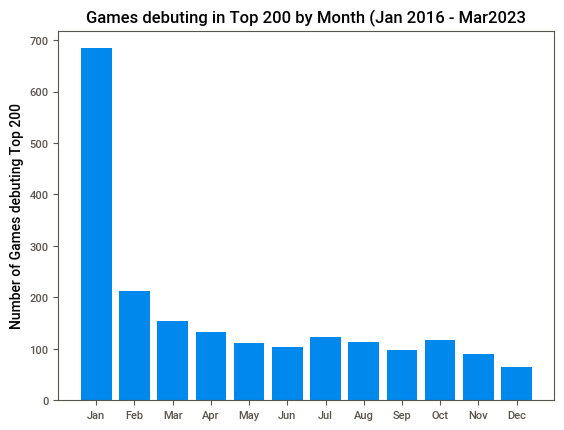

In [259]:
plt.bar(month, month_list)
plt.ylabel('Number of Games debuting Top 200')
plt.title('Games debuting in Top 200 by Month (Jan 2016 - Mar2023)')

In [260]:
one_month = twitch_df_X[twitch_df_X['Next_mth_200'] == 1]
month_list = []
for i in range(12):
    x = one_month[one_month['Month'] == i+1]
    x = sum(x['Next_mth_200'])
    month_list.append(x)

Text(0.5, 1.0, 'Games Remaining in Top 200 After One Month by Debut Month (Jan 2016 - Mar2023)')

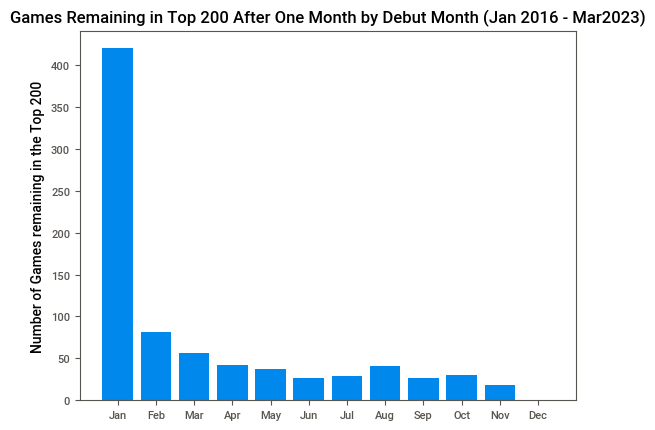

In [278]:
plt.bar(month, month_list)
plt.ylabel('Number of Games remaining in the Top 200')
plt.title('Games Remaining in Top 200 After One Month by Debut Month (Jan 2016 - Mar2023)')

In [262]:
len(one_month[one_month['Month'] == 12])

0

In [263]:
wtf = twitch_df_X[twitch_df_X['Month'] == 12]

In [264]:
wtf.tail(2)

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,...,Date,one_month_future,three_month_future,six_month_future,Hours_watched_1mth,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200,one
2023,Stalcraft,12,2022,1461144,29178,11735,113,3980,1964.0,39.0,...,2022-12-01,2023-01-01,2023-03-01,2023-06-01,0,0,0,0,0,1
2024,The Callisto Protocol,12,2022,8703710,215971,267668,2598,37504,11699.0,290.0,...,2022-12-01,2023-01-01,2023-03-01,2023-06-01,0,0,0,0,0,1


In [265]:
sum(wtf['Hours_watched_1mth'])

0

In [266]:
test_2022 = twitch_df_X[twitch_df_X['Year'] == 2022]

In [267]:
test_jan_2022 = test_2022[test_2022['Jan_Debut_Month'] == 1]

In [268]:
len(test_jan_2022)

60

In [269]:
len(test_2022)

225

In [270]:
60/225

0.26666666666666666

In [271]:
test_jan_2022[test_jan_2022['Next_mth_200'] == 1]

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,...,Date,one_month_future,three_month_future,six_month_future,Hours_watched_1mth,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200,one
578,Age of Empires IV,1,2022,2266990,39391,15818,117,5179,3047.0,53.0,...,2022-01-01,2022-02-01,2022-04-01,2022-07-01,1020833,1640288,837031,1,1,1
579,"Animals, Aquariums, and Zoos",1,2022,2319847,116691,12140,268,3619,3118.0,157.0,...,2022-01-01,2022-02-01,2022-04-01,2022-07-01,1915455,1524822,1564726,1,1,1
580,Anime World,1,2022,1959416,7171,5327,34,823,2634.0,10.0,...,2022-01-01,2022-02-01,2022-04-01,2022-07-01,1653554,1040425,1591661,1,1,1
581,Assetto Corsa Competizione,1,2022,698162,36747,45470,223,5565,938.0,49.0,...,2022-01-01,2022-02-01,2022-04-01,2022-07-01,595489,0,0,1,1,1
582,Axie Infinity,1,2022,880468,32134,7856,109,3794,1183.0,43.0,...,2022-01-01,2022-02-01,2022-04-01,2022-07-01,810881,0,0,1,1,1
584,Black Desert,1,2022,4275547,147711,16923,407,9513,5747.0,199.0,...,2022-01-01,2022-02-01,2022-04-01,2022-07-01,2879130,3728408,4314998,1,1,1
586,Call of Duty: Vanguard,1,2022,3894883,652404,30236,1820,107406,5235.0,877.0,...,2022-01-01,2022-02-01,2022-04-01,2022-07-01,3441180,3720834,2061868,1,1,1
588,Diablo II: Resurrected,1,2022,1482697,69452,17624,199,5839,1993.0,93.0,...,2022-01-01,2022-02-01,2022-04-01,2022-07-01,660872,2482689,677577,1,1,1
590,Escape from Tarkov,1,2022,93334264,1343113,690725,3186,71932,125449.0,1805.0,...,2022-01-01,2022-02-01,2022-04-01,2022-07-01,24312041,14338993,38628111,1,1,1
591,Eternal Return,1,2022,844922,40198,6393,137,3811,1136.0,54.0,...,2022-01-01,2022-02-01,2022-04-01,2022-07-01,1278895,1073892,1544674,1,1,1


In [272]:
test_2023 = twitch_df_X[twitch_df_X['Year'] == 2023]

In [273]:
test_jan_2023 = test_2023[test_2023['Jan_Debut_Month'] == 1]

In [274]:
len(test_2023)

80

In [275]:
len(test_jan_2023)

46

In [276]:
test_jan_2023[test_jan_2023['Next_mth_200'] == 1]

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,...,Date,one_month_future,three_month_future,six_month_future,Hours_watched_1mth,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200,one
639,Call of Duty: Modern Warfare II,1,2023,15772936,3141654,180032,8393,469399,21200.0,4223.0,...,2023-01-01,2023-02-01,2023-04-01,2023-07-01,20933682,0,0,1,1,1
641,Dark Souls: Remastered,1,2023,911697,54966,26542,153,9016,1225.0,74.0,...,2023-01-01,2023-02-01,2023-04-01,2023-07-01,1005228,0,0,1,1,1
642,Dead Space,1,2023,7730999,145532,262354,2992,32152,10391.0,196.0,...,2023-01-01,2023-02-01,2023-04-01,2023-07-01,4133204,0,0,1,1,1
644,F1 22,1,2023,825328,82762,19363,745,16489,1109.0,111.0,...,2023-01-01,2023-02-01,2023-04-01,2023-07-01,732687,0,0,1,1,1
645,FIFA 23,1,2023,35628664,920354,486778,4722,194696,47888.0,1237.0,...,2023-01-01,2023-02-01,2023-04-01,2023-07-01,22728200,0,0,1,1,1
646,FIFA Online 4,1,2023,1061504,10146,36896,49,1316,1427.0,14.0,...,2023-01-01,2023-02-01,2023-04-01,2023-07-01,2696008,0,0,1,1,1
648,Fire Emblem Engage,1,2023,2096346,86928,54855,869,6757,2818.0,117.0,...,2023-01-01,2023-02-01,2023-04-01,2023-07-01,1386007,0,0,1,1,1
649,Football Manager 2023,1,2023,1865542,31589,24313,120,2861,2507.0,42.0,...,2023-01-01,2023-02-01,2023-04-01,2023-07-01,1101582,0,0,1,1,1
651,God of War Ragnarok,1,2023,1727833,257951,26831,866,40012,2322.0,347.0,...,2023-01-01,2023-02-01,2023-04-01,2023-07-01,552004,0,0,1,1,1
653,HITMAN World of Assassination,1,2023,848708,8518,37803,144,2596,1141.0,11.0,...,2023-01-01,2023-02-01,2023-04-01,2023-07-01,4669684,0,0,1,1,1


In [277]:
27/46

0.5869565217391305